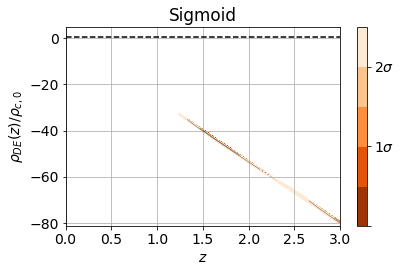

In [25]:
#prueba con archivos de atalia
import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao_new\\'
file_root += 'Rotation_phy_RC_mcmc'


samples, weights = samples_from_getdist_chains(['Anfw','rs'], file_root)

def PPS(r, theta):
    Anfw, rs = theta
    return (Anfw+rs)*r


z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Oranges_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


plt.rc('font', size=14)
plt.xscale('linear')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid()


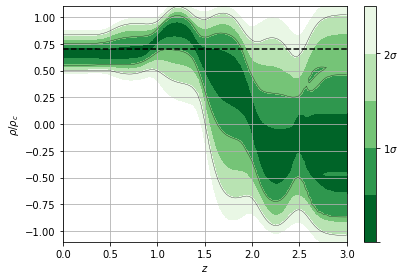

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao_new\\'
n_pars = 6
type_pars = 'bin' # node o bin

if type_pars=='bin':
    file_root += 'rho_tanh%d_phy_Pantheon+CBAO+HD_nested_dynesty_multi'%n_pars
elif type_pars=='node':
    file_root += 'rho_nodal%d_phy_Pantheon+CBAO+HD_nested_dynesty_multi'%n_pars

params=[]
for ii in range(n_pars):
    params+=['zbin_rho'+str(ii)]
params+=['Om']
samples, weights = samples_from_getdist_chains(params, file_root)

#bin
def PPS_bin(r, theta):
    samples = theta
    z_i = np.linspace(0.0,3.0,len(theta))
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-2):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
    return w*(1-theta[-1])

#node
def PPS_node(r, theta):
    samples = theta
    y=[]
    for ii in range(len(theta)-1):
        y.append(theta[ii])
    x = np.linspace(0.0,3.0, len(theta)-1)
    f = interp1d(x, y, kind='linear')
    rhow = f(r)
    return rhow*(1-theta[-1])


z = np.linspace(0,3,100)
if type_pars == 'bin':
    cbar = plot_contours(PPS_bin, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Greens_r)
elif type_pars == 'node':
    cbar = plot_contours(PPS_node, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Greens_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

lcdm = np.empty(100)
lcdm.fill(-1.0)
plt.plot(z,lcdm, linestyle='--', color='k')

plt.rc('font', size=14)
plt.xscale('linear')
plt.ylim(-1.1,1.1)
plt.ylabel(r'$\rho/\rho_c$')
plt.xlabel(r'$z$')
plt.grid(axis = 'both')
plt.tight_layout()
plt.savefig('figs_full_panth/rho_%d%s_full_panth.pdf'%(n_pars,type_pars))

## 4y2x de rho y eos, bins y nodos

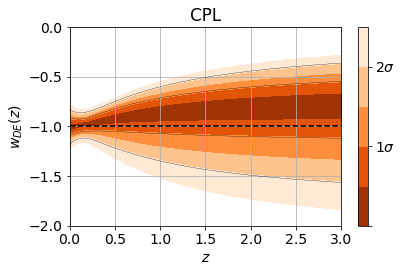

In [4]:
#Para CPL y wCDM y rho_1bin
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from fgivenx import plot_contours, samples_from_getdist_chains


file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao_new\\'

file_root += 'waCDM_phy_Pantheon+CBAO+HD_nested_dynesty_multi'
samples, weights = samples_from_getdist_chains(['w','wa'], file_root)
def PPS(r, theta):
    w, wa = theta
    return w+(wa*r)/(1+r)

#file_root += 'wCDM_phy_Pantheon+CBAO+HD_nested_dynesty_multi'
#samples, weights = samples_from_getdist_chains(['w', 'h'], file_root)
#def PPS(r, theta):
#    w, h = theta
#    x = [0.0,3.0]
#    y = [w,h*(w/h)]
#    f = interp1d(x, y, kind='linear')
#    rhow = f(r)
#    return rhow

#file_root += 'rho_tanh1_phy_Pantheon+CBAO+HD_nested_dynesty_multi'
#samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1', 'h'], file_root)
#def PPS(r, theta):
#    zbin_rho0, zbin_rho1, Om= theta
#    z_i = np.linspace(0.0,3.0,len(theta))
#    def bines(w_2,w_1,z_2,z_1,eta):
#        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
#    w=theta[0]
#    for jj in range(len(theta)-2):
#        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
#    return w*theta[-1]



z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Oranges_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.empty(100)
lcdm.fill(-1.)
plt.plot(z,lcdm, linestyle='--', color='k')

plt.rc('font', size=14)
plt.xscale('linear')
#plt.ylim(-1.1,1.1)
#plt.ylabel(r'$\rho_{DE}(z)/\rho_{c,0}$')
plt.ylim(-2.,0.)
plt.ylabel(r'$w_{DE}(z)$')

plt.grid(axis = 'both')
plt.xlabel(r'$z$')
plt.title('CPL')
plt.tight_layout()
#plt.savefig('figs_full_panth/rho_1bin_full_panth.pdf')
plt.savefig('figs_full_panth/cpl_full_panth.pdf')

In [30]:
fgivenx_4y2x(file_root=u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao_new\\',type_func='eos',type_pars='node')


<Figure size 432x288 with 0 Axes>

In [1]:
#rho sigmoide
import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao_new\\'
#file_root += 'rho_sigmoid_phy_Pantheon+CBAO+HD_nested_dynesty_multi'
file_root += 'rho_sigmoid_smooth_phy_Pantheon+CBAO+HD_nested_dynesty_multi'


#samples, weights = samples_from_getdist_chains(['sigmoidxi','zcut','Om'], file_root)
samples, weights = samples_from_getdist_chains(['zcut','Om'], file_root)

def PPS(r, theta):
    #sigmoidxi, zcut, Om= theta
    #return (1. - 1./(1.+np.exp(-sigmoidxi*(r-zcut))))*(1-Om)
    zcut, Om= theta
    return (1. - 1./(1.+np.exp(-9.*(r-zcut))))*(1-Om)


z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Oranges_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

lcdm = np.empty(100)
lcdm.fill(0.7)
plt.plot(z,lcdm, linestyle='--', color='k')

plt.rc('font', size=14)
plt.xscale('linear')
plt.ylim(-0.05,0.75)
plt.ylabel(r'$\rho_{DE}(z)/\rho_{c,0}$')
plt.title('Sigmoid')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid()
#plt.savefig('figs_full_panth/rho_sigmoid_full_panth.pdf')

C:\Users\52811\cosas_python\SimpleMC-master\chains_zhao_new\rho_sigmoid_smooth_phy_Pantheon+CBAO+HD_nested_dynesty_multi_1.txt
Removed no burn in


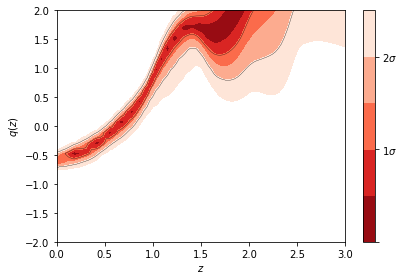

In [4]:
#con 15 bins
#prueba para integral con w(z)
#YA FUNCIONÓ ALV PRRO

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import trapz
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao_new\\'
#file_root += 'eos_tanh15_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
file_root += 'eos_tanh6_phy_Pantheon+CBAO+HD_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_eos0','zbin_eos1','zbin_eos2','zbin_eos3','zbin_eos4',
                                                'zbin_eos5','Om'],file_root)


def PPS(r, theta):
    zbin_eos0, zbin_eos1, zbin_eos2, zbin_eos3, zbin_eos4, zbin_eos5, Om = theta
    #, zbin_eos6, zbin_eos7, zbin_eos8, zbin_eos9, zbin_eos10, zbin_eos11, zbin_eos12, zbin_eos13, zbin_eos14, Om= theta
    z_i = np.linspace(0.0,3.0,len(theta))
    def luisfunction(z):
        def luisfunction2(z):
            def bines(w_2,w_1,z_2,z_1,eta):
                return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
            w=theta[0]
            for jj in range(len(theta)-2):
                w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
            rhow=w
            return rhow
        rhow=luisfunction2(z)
        resultado = []
        for ii in range(len(z)):
            #resultado += [quad(lambda b: 3.0*(1.0+(luisfunction2(b)))/(1.0+b), 0.0, r[ii] )[0]]
            #resultado += [3.0*(1+trapz([-1,-1],[0,1]))/(1.0+z)]
            resultado += [trapz(-3.0*(1.0+(luisfunction2(r[:ii])))/(1.0+r[:ii]),r[:ii])]
        return rhow , resultado
    omDE = (1-Om)*(np.exp(luisfunction(z)[1]))
    return 0.5*Om*((1+z)**3)+(0.5)*(1+3*(luisfunction(z)[0]))*(omDE)


z = np.linspace(0.0,3.0,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-2.,2.)
plt.ylabel(r'$q(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
#plt.savefig('eos_15bins_zhao_dynesty.pdf')

# IDE

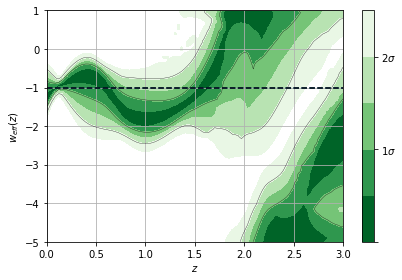

In [19]:
#prueba para modelos con interaccion
#para 10 y 5 nodos con gp y con w_ide

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.misc import derivative
from scipy.interpolate import interp1d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_ide\\'
file_root += 'idegp5_phy_HD+Pantheon+CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['zbin_ide0','zbin_ide1','zbin_ide2','zbin_ide3','zbin_ide4',
                                                #'zbin_ide5','zbin_ide6','zbin_ide7','zbin_ide8','zbin_ide9',
                                                'Om', 'h', 'w_ide'],file_root)


def PPS(r, theta):    
    samples = theta 
    ide_i = []
    for ii in range(np.shape(theta)[0]-3):
        ide_i += [theta[ii]]
    z_i = np.atleast_2d(np.linspace(0.0,3.0,len(ide_i))).T
    kernel = RBF(1,(1e-2,1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1, optimizer=None)
    gp.fit(z_i, ide_i)
    
    x = np.atleast_2d(np.linspace(0, 3, 100)).T
    ide_gp = gp.predict(x)
    
    def de_ide(z):
        ide = gp.predict([[z]])
        return ide
    def model_de(rhode,r):
        drhodz = (3/(1+r))*(rhode*(1+theta[-1])+de_ide(r))
        return drhodz
    def model_dm(rhodm,r):
        drhodz = (3/(1+r))*(rhodm-de_ide(r))
        return drhodz
    
    '''
    y0 = theta[-3]
    rho_de = odeint(model_de,1-y0,r)
    rho_dm = odeint(model_dm,y0,r)
    '''
    
    #sacar parametro desaceleracion
    #sacar w effectiva
    #sacar rho_de
       
    #pruebas con interpolaciones de las ecs. difs.
    y0 = theta[-3]
    zinter = np.linspace(0.0, 3.0, 50)
    rhowde = np.reshape(odeint(model_de ,1.0-y0 ,zinter),len(zinter))
    rhowdm = np.reshape(odeint(model_dm ,y0 ,zinter),len(zinter))
    rho_de = interp1d(zinter, rhowde, kind='cubic')
    rho_dm = interp1d(zinter, rhowdm, kind='cubic')
    
    def Hz(r):
        return theta[-2]*100*(rho_dm(r) + rho_de(r))**0.5
        #return (rho_dm(r) + rho_de(r))**0.5
    def Qz(r):
        #multiplicar por ide_gp
        return -((9*theta[-2]*theta[-2])/(8*np.pi))*Hz(r)
    def deltaz(r):
        #multiplicarlo por ide_gp en return
        return -((27)/(8*np.pi*theta[-2]*100))*Hz(r)/((1+r)**4)
    def qz(r):
        dhz = [derivative(Hz, ii, dx=1e-6) for ii in r]
        return (1+r)*dhz/Hz(r) - 1 
    def qz2(r):
        return (rho_dm(r)+(1+3*theta[-1])*rho_de(r))/(2*Hz(r)*Hz(r))
    def w_eff(r):
        #multiplicar por ide_gp y sumar theta[-1]
        e_o_s = -1/(rho_de(r))
        for n,i in enumerate(e_o_s):
            if i>16:
                e_o_s[n] = 16
            elif i<-16:
                e_o_s[n] = -16
        return e_o_s
    weff = theta[-1] + w_eff(r)*ide_gp
    for n,i in enumerate(weff):
        if i>1:
            weff[n] = 1
        elif i<-5:
            weff[n] = -5
    def IQ(z):
        #multiplicar por ide_gp
        return -3/((1+z)**3)
    
    
    
    
    #print(odeint(model_dm,y0,r)[1])
    #return theta[-1] + w_eff(r)*
    return weff
    #return deltaz(r)*ide_gp
    #return IQ(r)*ide_gp



z = np.linspace(0.00001,2.9999,100)
cbar = plot_contours(PPS, z, samples, weights=weights, contour_line_levels=[1,2], colors=plt.cm.Greens_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])



lcdm = np.empty(100)
lcdm.fill(-1.)
plt.plot(z,lcdm, linestyle='--')


'''
def q(x):
    def hlcdm(x2):
        return (0.3*((1+x2)**3)+(0.7))**0.5
    dhlcdm = derivative(hlcdm, x, dx=1e-6)
    return (1+x)*dhlcdm/hlcdm(x) - 1
lcdm = []
for ii in range(100):
    lcdm += [q(z[ii])]
'''


'''
lcdm = []
for ii in range(100):
    lcdm += [(68*(0.3*((1+z[ii])**3)+(0.7))**0.5)/(1+z[ii])]
rd_fid_DR12 = 147.78
zLyaA = 2.37
zLyaC = 2.35
zCombBAO1 = 0.38
zCombBAO2 = 0.51
zCombBAO3 = 0.61
fact = (300000./rd_fid_DR12)
def ersys(x, y):
    return np.sqrt(x**2 + y**2)
#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaC,  fact/9.20/(1+zLyaC),        yerr=0.36*fact/(1+zLyaC)/9.20**2,
              color='red', fmt='s', markersize=6, elinewidth=1.5)
#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaA,  fact/8.86/(1+zLyaA),        yerr=0.29*fact/(1+zLyaA)/8.86**2,
              color='red', fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zCombBAO1,  81.21/(1+zCombBAO1),       yerr=ersys(2.17, 0.97)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO2,  90.90/(1+zCombBAO2),       yerr=ersys(2.07, 1.08)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO3,  98.96/(1+zCombBAO3),       yerr=ersys(2.21, 1.18)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(0.01,  69.8,       yerr=0.8,
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(1.52,  159/2.52, yerr=12/2.52,  color='red', fmt='d', markersize=6, elinewidth=1.5)
'''



plt.plot(z,lcdm, linestyle='--', color='k')
plt.xscale('linear')
plt.xlim(0.0,3.0)
#plt.ylim(-5.0, 1.5)
#plt.ylim(55.0,80.0)
#plt.ylim(-300.,300.)
plt.ylabel(r'$w_{eff}(z)$')
#plt.ylabel(r'$H(z)/(1+z)$ [km/s/Mpc]')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid()
#plt.savefig('figs_gp/deltaz_idegp10_wide.pdf')
plt.savefig('figs_gp/weff_idegp5_wide.pdf')

C:\Users\52811\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in sqrt
C:\Users\52811\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in sqrt
C:\Users\52811\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in sqrt


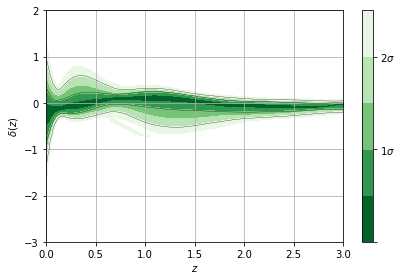

In [2]:
#prueba para modelos con interaccion
#para 5 nodos con gp para ide y eos

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.misc import derivative
from scipy.interpolate import interp1d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_ide\\'
file_root += 'ide5_eos5_gp_phy_HD+Pantheon+CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['zbin_ide0','zbin_ide1','zbin_ide2','zbin_ide3','zbin_ide4',
                                                'zbin_eos0','zbin_eos1','zbin_eos2','zbin_eos3','zbin_eos4',
                                                'Om', 'h'],file_root)


def PPS(r, theta):    
    samples = theta 
    ide_i = []
    eos_i = []
    for ii in range(np.shape(theta)[0]-7):
        ide_i += [theta[ii]]
        eos_i += [theta[ii+5]]
    z_i = np.atleast_2d(np.linspace(0.0,3.0,len(ide_i))).T
    kernel = RBF(1,(1e-2,1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1, optimizer=None)
    gp2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1, optimizer=None)
    x = np.atleast_2d(np.linspace(0, 3, 100)).T
   
    gp.fit(z_i, ide_i)
    ide_gp = gp.predict(x)
    
    gp2.fit(z_i, eos_i)
    eos_gp = gp2.predict(x)
    
    
    def de_ide(z):
        gp.fit(z_i, ide_i)
        ide = gp.predict([[z]])
        return ide
    def eos_ide(z):
        gp2.fit(z_i, eos_i)
        eos = gp2.predict([[z]])
        return eos
    def model_de(rhode,r):
        drhodz = (3/(1+r))*(rhode*(1+eos_ide(r))+de_ide(r))
        return drhodz
    def model_dm(rhodm,r):
        drhodz = (3/(1+r))*(rhodm-de_ide(r))
        return drhodz

    #sacar parametro desaceleracion
    #sacar w effectiva
    #sacar rho_de
       
    #pruebas con interpolaciones de las ecs. difs.
    y0 = theta[-2]
    zinter = np.linspace(0.0, 3.0, 50)
    rhowde = np.reshape(odeint(model_de ,1.0-y0 ,zinter),len(zinter))
    rhowdm = np.reshape(odeint(model_dm ,y0 ,zinter),len(zinter))
    rho_de = interp1d(zinter, rhowde, kind='cubic')
    rho_dm = interp1d(zinter, rhowdm, kind='cubic')
    
    def Hz(r):
        return theta[-1]*100*(rho_dm(r) + rho_de(r))**0.5
        #return (rho_dm(r) + rho_de(r))**0.5
    def Qz(r):
        #multiplicar por ide_gp
        return -((9*theta[-1]*theta[-1])/(8*np.pi))*Hz(r)
    def deltaz(r):
        #multiplicarlo por ide_gp en return
        return ((27)/(8*np.pi*theta[-1]*100))*Hz(r)/((1+r)**4)
    def qz(r):
        dhz = [derivative(Hz, ii, dx=1e-6) for ii in r]
        return (1+r)*dhz/Hz(r) - 1 
    #def qz2(r):
    #    return (rho_dm(r)+(1+3*theta[-1])*rho_de(r))/(2*Hz(r)*Hz(r))
    def w_eff(r):
        #multiplicar por ide_gp y sumar eos_gp
        e_o_s = -1/(rho_de(r))
        for n,i in enumerate(e_o_s):
            if i>16:
                e_o_s[n] = 16
            elif i<-16:
                e_o_s[n] = -16
        return e_o_s
    
    
    '''
    def hz(r):
        return (Om*((1+r)**3)+(rho(r)*(1-Om)))**0.5
    if derived == 'rho_dot':
        drho = [derivative(rho, ii, dx=1e-6) for ii in r]
        return -(1+r)*drho/3.0
    elif derived == 'eq_of_st' and type_func == 'rho':
        drho = [derivative(rho, ii, dx=1e-6) for ii in r]
        e_o_s = -(1+r)*drho/(3.0*rho(r))-1
        for n,i in enumerate(e_o_s):
            if i>16:
                e_o_s[n] = 16
            elif i<-16:
                e_o_s[n] = -16
        return e_o_s
    elif derived == 'pressure':
        drho = [derivative(rho, ii, dx=1e-6) for ii in r]
        return -(1+r)*drho/3.0-rho(r)
    elif derived == 'qz':
        dhz = [derivative(hz, ii, dx=1e-6) for ii in r]
        return (1+r)*dhz/hz(r) - 1
    elif derived == 'hz':
        return (100*theta[-1]*hz(r))/(1+r)
    '''
    
    return deltaz(r)*ide_gp






z = np.linspace(0.00001,2.9999,100)
cbar = plot_contours(PPS, z, samples, weights=weights, contour_line_levels=[1,2], colors=plt.cm.Greens_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


'''
lcdm = np.empty(100)
lcdm.fill(0.)
plt.plot(z,lcdm, linestyle='--')
'''

def q(x):
    def hlcdm(x2):
        return (0.3*((1+x2)**3)+(0.7))**0.5
    dhlcdm = derivative(hlcdm, x, dx=1e-6)
    return (1+x)*dhlcdm/hlcdm(x) - 1
lcdm = []
for ii in range(100):
    lcdm += [q(z[ii])]
plt.plot(z,lcdm, linestyle='--', color='k')

'''
lcdm = []
for ii in range(100):
    lcdm += [(68*(0.3*((1+z[ii])**3)+(0.7))**0.5)/(1+z[ii])]
rd_fid_DR12 = 147.78
zLyaA = 2.37
zLyaC = 2.35
zCombBAO1 = 0.38
zCombBAO2 = 0.51
zCombBAO3 = 0.61
fact = (300000./rd_fid_DR12)
def ersys(x, y):
    return np.sqrt(x**2 + y**2)
#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaC,  fact/9.20/(1+zLyaC),        yerr=0.36*fact/(1+zLyaC)/9.20**2,
              color='red', fmt='s', markersize=6, elinewidth=1.5)
#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaA,  fact/8.86/(1+zLyaA),        yerr=0.29*fact/(1+zLyaA)/8.86**2,
              color='red', fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zCombBAO1,  81.21/(1+zCombBAO1),       yerr=ersys(2.17, 0.97)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO2,  90.90/(1+zCombBAO2),       yerr=ersys(2.07, 1.08)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO3,  98.96/(1+zCombBAO3),       yerr=ersys(2.21, 1.18)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(0.01,  69.8,       yerr=0.8,
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(1.52,  159/2.52, yerr=12/2.52,  color='red', fmt='d', markersize=6, elinewidth=1.5)
'''



plt.xscale('linear')
plt.xlim(0.0,3.0)
plt.ylim(-3.0, 2.0)
#plt.ylim(55.0,80.0)
#plt.ylim(-300.,300.)
plt.ylabel(r'$\delta(z)$')
#plt.ylabel(r'$H(z)/(1+z)$ [km/s/Mpc]')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid()
plt.savefig('figs_gp/deltaz_ide5_eos5_gp.pdf')

In [ ]:
#prueba para ec. dif.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_ide\\'
file_root += 'idegp10_phy_HD+Pantheon+CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['zbin_ide0','zbin_ide1'],file_root)

def PPS(r, theta):
    '''
    y=[]
    for ii in range(len(theta)):
        y.append(theta[ii])
    w_i = np.asarray(y)
    z_i = np.atleast_2d(np.linspace(0.0, 3.0, len(theta))).T
    kernel = RBF(1,(1e-2,1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1, optimizer=None)
    gp.fit(z_i, w_i)    
    x = np.atleast_2d(np.linspace(0, 3, 100)).T
    def ide_tanh(r):
        return gp.predict(r)
    '''
    samples = theta  
    
    ide_i = []
    for ii in range(np.shape(theta)[0]):
        ide_i += [theta[ii]]
    #ide_i = [theta[0],theta[1]]
    z_i = np.atleast_2d(np.linspace(0.0,3.0,len(ide_i))).T
    kernel = RBF(1,(1e-2,1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1, optimizer=None)
    gp.fit(z_i, ide_i)
    
    def de_ide(z):
        ide = gp.predict([[z]])
        return ide
    
    def model_de(rho,r):
        drhodz = rho*2*de_ide(r)
        return drhodz
    
    x = np.atleast_2d(np.linspace(0, 3, 100)).T
    test_gp = gp.predict(x)
    
    y0 = theta[1]
    model_1 = odeint(model_de,y0,r)
    model_2 = model_1*test_gp
    
    #return(gp.predict(x))
    return model_2
    #return theta[0]*r

z = np.linspace(0.,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights, contour_line_levels=[1,2], colors=plt.cm.Greens_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
#plt.ylim(-5.0,0.0)
plt.ylabel(r'$Q(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid()
#plt.savefig('figs_gp/bessel_no_negative.pdf')

# Combinacion de todo lo anterior en una sola 

In [17]:
#Combinacion de todo lo anterior en una sola

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import trapz
from scipy.misc import derivative
from fgivenx import plot_contours, samples_from_getdist_chains

#en forma de funcion pa que sea mas rapido
#n_pars es el numero de nodos/bines, si se usa 4y2x debe ser 0.
#type_pars puede ser node o bin
#type_func puede ser eos o rho
#ide dice si hay interaccion entre DM y DE
#derived puede ser none, rho_dot, pressure, hz, qz, om_diag, density_param (para eos), eq_of_st (para rho)

def fgivenx_recons(file_root,n_pars=0,type_pars='node',type_func='eos',zhao=False,fourytwox=False
                   ,derived='none', ide=False, ide_eos=False):
    
    if ide==False:
        if derived!='none':
            savestyle=derived+'_'+type_func+'_'
        else:
            savestyle=type_func+'_'
        style=type_func
        if fourytwox==True:
            style+='_4y2x'
            savestyle+='4y2x_'
        if type_pars=='node':
            style+='_nodal'
        elif type_pars=='bin':
            if fourytwox==True:
                style+='_bins'
            else:
                style+='_tanh'
        if n_pars!=0:
            style+='%d'%n_pars
            savestyle+='%d'%n_pars
        savestyle+= type_pars
        style+='_phy_'
        if zhao==True:
            style+='%s_corr+'%type_func
            savestyle+='_zhao'
        file_root += style+'Pantheon+CBAO+HD_nested_dynesty_multi'
        print('Se usaran las cadenas:',file_root)
    
    elif ide==True:
        if derived!='none':
            savestyle=derived+'_'+'ide%d'%n_pars
        else:
            savestyle='ide%d'%n_pars
        if ide_eos==True:
            style='ide%d_eos%d'%n_pars
            savestyle+='eos%d'%n_pars
        elif ide_eos==False:
            style='ide%d'%n_pars
        if n_pars!=0:
            style+='%d'%n_pars
            savestyle+='%d'%n_pars
        savestyle+= type_pars
        style+='_phy_'
        file_root += style+'HD+Pantheon+CBAO_nested_dynesty_multi'
        print('Se usaran las cadenas:',file_root)

    
    
    if type_func=='rho' and fourytwox==False :
        n_pars += 1
    params=[]
    if ide==False:
        for ii in range(n_pars):
            params+=['zbin_%s'%type_func+str(ii)]
    elif ide==True and ide_eos==True:
        for ii in range(n_pars):
            params+=['zbin_%s'%type_func+str(ii)]
        for ii in range(n_pars):
            params+=['zbin_ide'+str(ii)]
    elif ide==True and ide_eos==False:
        for ii in range(n_pars):
            params+=['zbin_ide'+str(ii)]
    params+=['Om']
    params+=['h']
    if fourytwox==True:
        samples, weights = samples_from_getdist_chains(['luis71','luis72','luis73','luis74','w72', 'w73','Om','h'], file_root)
    else:
        samples, weights = samples_from_getdist_chains(params, file_root)
        

    #bin
    def PPS_bin(r, theta):
        if fourytwox == False:
            samples = theta
            z_i = np.linspace(0.0,3.0,len(theta)-1)
            n = 0
            m = 0
        elif fourytwox == True:
            luis71, luis72, luis73, luis74, w72, w73, Om, h = theta
            w_i = [luis71,luis72,luis73,luis74]
            z_i = [0.0, w72, w73, 2.25, 3.0]
            n = 2
            m = 0
        def bines(w_2,w_1,z_2,z_1,eta):
            return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
        if type_func=='eos' and derived!='none':
            def rho(r):
                def rho2(r):
                    w = theta[0]
                    for jj in range(len(theta)-3-n):
                        w += bines(theta[jj+1],theta[jj],r,z_i[jj+1],0.15)
                    return w
                resultado=[]
                for ii in range(len(z)):
                    resultado += [trapz(3.0*(1.0+(rho2(z[:ii])))/(1.0+z[:ii]),z[:ii])]
                return np.exp(resultado)
        else:
            def rho(r):
                if fourytwox==True and type_func=='rho':
                    w = 1.0
                else:
                    w = theta[0]
                for jj in range(len(theta)-3-n):
                    if jj==0 and m==1:
                        w += bines(theta[1],1.0,r,z_i[1],0.15)
                    else:
                        w += bines(theta[jj+1],theta[jj],r,z_i[jj+1],0.15)
                return w
        def hz(r):
            return (theta[-2]*((1+r)**3)+(rho(r)*(1-theta[-2])))**0.5
        def mult(r):
            return rho(r)*(hz(r)**2)
        if derived == 'rho_dot':
            drho = [derivative(rho, ii, dx=1e-6) for ii in r]
            return -(1+r)*drho/3.0
        elif derived == 'eq_of_st' and type_func == 'rho':
            drho = [derivative(rho, ii, dx=1e-6) for ii in r]
            e_o_s = (1+r)*drho/(3.0*rho(r))-1
            for n,i in enumerate(e_o_s):
                if i>10:
                    e_o_s[n] = 10
                elif i<-10:
                    e_o_s[n] = -10
            return e_o_s
        elif derived == 'pressure':
            drho = [derivative(rho, ii, dx=1e-6) for ii in r]
            return -(1+r)*drho/3.0-rho(r)
        elif derived == 'qz':
            if type_func == 'eos':
                def rho2(r):
                    w = theta[0]
                    for jj in range(len(theta)-3-n):
                        w += bines(theta[jj+1],theta[jj],r,z_i[jj+1],0.15)
                    return w
                return (0.5*theta[-2]*((1+r)**3)+(0.5)*(1+3*(rho2(r)))*(1-theta[-2])*(rho(r)))/(hz(r)**2)
            else: 
                dhz = [derivative(hz, ii, dx=1e-6) for ii in z]
                return (1+r)*dhz/hz(r) - 1
        elif derived == 'hz':
            return (100*theta[-1]*hz(r))/(1+r)
        elif derived == 'om_diag':
            return (theta[-2]*((1+r)**3)+((rho(r))*(1-theta[-2]))-1)/((1+r)**3-1)
        elif type_func == 'rho':
            return rho(r)*(1-theta[-2])
        elif type_func == 'eos' and derived == 'none':
            return rho(r)
        elif type_func == 'eos' and derived == 'density_param':
            return (1-theta[-2])*rho(r)


    #node
    def PPS_node(r, theta):
        if fourytwox == False:
            samples = theta
            y=[]
            for ii in range(len(theta)-2):
                y.append(theta[ii])
            x = np.linspace(0.0,3.0, len(theta)-2)
        elif fourytwox == True:
            luis71, luis72, luis73, luis74, w72, w73, Om, h= theta
            y = [luis71, luis72, luis73, luis74]
            x = [0.0, w72, w73, 3.0]
        def rho(r):
            if derived != 'none' and n_pars>3:
                f = interp1d(x, y, kind='cubic')
            else:
                f = interp1d(x, y, kind='linear')
            rhow = f(r)
            return rhow
        def hz(r):
            return (theta[-2]*((1+r)**3)+(rho(r)*(1-theta[-2])))**0.5
        if derived == 'rho_dot':
            drho = [derivative(rho, ii, dx=1e-6) for ii in r]
            return -(1+r)*drho/3.0
        elif derived == 'eq_of_st' and type_func == 'rho':
            drho = [derivative(rho, ii, dx=1e-6) for ii in r]
            e_o_s = -(1+r)*drho/(3.0*rho(r))-1
            for n,i in enumerate(e_o_s):
                if i>16:
                    e_o_s[n] = 16
                elif i<-16:
                    e_o_s[n] = -16
            return e_o_s
        elif derived == 'pressure':
            drho = [derivative(rho, ii, dx=1e-6) for ii in r]
            return -(1+r)*drho/3.0-rho(r)
        elif derived == 'qz':
            dhz = [derivative(hz, ii, dx=1e-6) for ii in r]
            return (1+r)*dhz/hz(r) - 1
        elif derived == 'hz':
            return (100*theta[-1]*hz(r))/(1+r)
        elif derived == 'om_diag':
            return (theta[-2]*((1+r)**3)+(rho(r)*(1-theta[-2]))-1)/((1+r)**3-1)
        elif type_func == 'rho':
            return rho(r)*(1-theta[-2])
        elif type_func == 'eos':
            return rho(r)

        
    if derived!='none':
        z_ini = 0.0001
        if derived == 'om_diag':
            z_ini = 0.1
        z = np.linspace(z_ini,2.999,100)
    elif derived == 'none':
        z = np.linspace(0,3,100)
        
        
    if type_func == 'rho':
        if type_pars == 'bin':
            if derived != 'none':
                cbar = plot_contours(PPS_bin, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Blues_r)
            else:    
                cbar = plot_contours(PPS_bin, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Greens_r)
        elif type_pars == 'node':
            if derived != 'none':
                cbar = plot_contours(PPS_node, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Blues_r)
            else:                
                cbar = plot_contours(PPS_node, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Greens_r)
    elif type_func == 'eos':
        if type_pars == 'bin':
            if derived != 'none':
                cbar = plot_contours(PPS_bin, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Blues_r)
            else:                
                cbar = plot_contours(PPS_bin, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Purples_r)
        elif type_pars == 'node':
            if derived != 'none':
                cbar = plot_contours(PPS_node, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Blues_r)
            else:                
                cbar = plot_contours(PPS_node, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Purples_r)
    cbar = plt.colorbar(cbar,ticks=[0,1,2])
    cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

    
    lcdm = np.empty(100)
    if derived == 'rho_dot':
        lcdm.fill(0.0)
    elif derived == 'pressure':
        lcdm.fill(-0.7)
    elif derived == 'qz':
        def q(x):
            def hlcdm(x2):
                return (0.3*((1+x2)**3)+(0.7))**0.5
            dhlcdm = derivative(hlcdm, x, dx=1e-6)
            return (1+x)*dhlcdm/hlcdm(x) - 1
        lcdm = []
        for ii in range(100):
            lcdm += [q(z[ii])]
    elif derived == 'hz':
        lcdm = []
        for ii in range(100):
            lcdm += [(68*(0.3*((1+z[ii])**3)+(0.7))**0.5)/(1+z[ii])]
        rd_fid_DR12 = 147.78
        zLyaA = 2.37
        zLyaC = 2.35
        zCombBAO1 = 0.38
        zCombBAO2 = 0.51
        zCombBAO3 = 0.61
        fact = (300000./rd_fid_DR12)
        def ersys(x, y):
            return np.sqrt(x**2 + y**2)
        #https://arxiv.org/abs/1904.03430
        plt.errorbar(zLyaC,  fact/9.20/(1+zLyaC),        yerr=0.36*fact/(1+zLyaC)/9.20**2,
                      color='red', fmt='s', markersize=6, elinewidth=1.5)
        #https://arxiv.org/abs/1904.03430
        plt.errorbar(zLyaA,  fact/8.86/(1+zLyaA),        yerr=0.29*fact/(1+zLyaA)/8.86**2,
                      color='red', fmt='s', markersize=6, elinewidth=1.5)
        
        plt.errorbar(zCombBAO1,  81.21/(1+zCombBAO1),       yerr=ersys(2.17, 0.97)/(1+zCombBAO1),
                      color='red', fmt='d', markersize=6, elinewidth=1.5)
        plt.errorbar(zCombBAO2,  90.90/(1+zCombBAO2),       yerr=ersys(2.07, 1.08)/(1+zCombBAO1),
                      color='red', fmt='d', markersize=6, elinewidth=1.5)
        plt.errorbar(zCombBAO3,  98.96/(1+zCombBAO3),       yerr=ersys(2.21, 1.18)/(1+zCombBAO1),
                      color='red', fmt='d', markersize=6, elinewidth=1.5)
        plt.errorbar(0.01,  69.8,       yerr=0.8,
                      color='red', fmt='d', markersize=6, elinewidth=1.5)
        plt.errorbar(1.52,  159/2.52, yerr=12/2.52,  color='red', fmt='d', markersize=6, elinewidth=1.5)

    elif derived == 'om_diag':
        lcdm.fill(0.3)
    elif type_func == 'eos' and derived == 'none':
        lcdm.fill(-1.0)
    elif derived == 'eq_of_st':
        lcdm.fill(-1.0)
    elif type_func == 'rho' or derived == 'density_param':
        lcdm.fill(0.7)
    plt.plot(z,lcdm, linestyle='--', color='k')

    
    w_i = [0.906*0.7228,
         1.0208*0.7228,
         0.6495*0.7228,
             0.9827*0.7228,
             1.0031*0.7228,
             0.7694*0.7228,
             0.8574*0.7228,
             0.9321*0.7228,
             0.9531*0.7228,
             0.8574*0.7228,
            0.3749*0.7228,
             0.2213*0.7228,
                 0.1163*0.7228,
             -0.004*0.7228,
             -0.189*0.7228,
             -0.3511*0.7228,
             -0.2101*0.7228,
                 -0.0902*0.7228,
             0.0165*0.7228,
         -0.0101*0.7228]
    z_i = np.linspace(0.0,3.0,21)
    w_z=[]
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2

    def rho(r):
        w = w_i[0]
        for jj in range(len(w_i)-1):
            w += bines(w_i[jj+1],w_i[jj],r,z_i[jj+1],0.15)
        return w
    drho = [derivative(rho, ii, dx=1e-6) for ii in z]
    e_o_s = (1+z)*drho/(3.0*rho(z))-1
    for n,i in enumerate(e_o_s):
        if i>100:
            e_o_s[n] = 100 
        elif i<-100:
            e_o_s[n] = -100
    if derived == 'eq_of_st':
        plt.plot(z,e_o_s, linestyle='dotted', color='r')

    
    
    plt.rc('font', size=14)
    plt.xscale('linear')
    if derived == 'rho_dot':
        plt.ylim(-7.,7.)
        plt.ylabel(r'$\dot{\rho}/3H$')
    elif derived == 'pressure':
        plt.ylim(-7.,7.)
        plt.ylabel(r'p(z)')
    elif derived == 'qz':
        plt.ylim(-0.8,1.2)
        plt.ylabel(r'$q(z)$')
    elif derived == 'hz':
        plt.ylim(55.0,80.0)
        plt.ylabel(r'$H(z)/(1+z)$ [km/s/Mpc]')
    elif derived == 'om_diag':
        #plt.ylim(-0.5,1.)
        plt.ylim(0.2,0.4)
        plt.ylabel(r'$Om$')
    elif derived == 'eq_of_st':
        #plt.ylim(-2.5,0.0)
        plt.ylim(-3.,2.)
        plt.ylabel(r'$w_{DE}(z)$')
    elif derived == 'density_param' and type_func == 'eos':
        plt.ylim(0.0,1.2)
        plt.ylabel(r'$\rho_{DE}(z)/\rho_{c,0}$')
    elif type_func == 'rho':
        plt.ylim(-1.1,1.6)
        plt.ylabel(r'$\rho_{DE}(z)/\rho_{c,0}$')
    elif type_func == 'eos' and derived =='none':
        plt.ylim(-2.5,0.0)
        plt.ylabel(r'$w_{DE}(z)$')
    plt.xlabel(r'$z$')
    if derived != 'none':
        if type_func == 'eos':
            plt.title(r'From $w_{DE}(z)$')
        elif type_func == 'rho':
            plt.title(r'From $\rho_{DE}(z)/\rho_{c,0}$')
    #plt.title(r'%d parameters'%n_pars)
    #plt.title(r'20 parameters with CPZ')
    #plt.title(r'4y2x bins')
    plt.tight_layout()
    plt.grid()
    plt.savefig('figs_full_panth/'+savestyle+'_full_panth.pdf')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [19]:
#etiquetas = ['none', 'rho_dot', 'pressure', 'hz', 'qz', 'om_diag', 'density_param', 'eq_of_st']
#etiquetas = ['hz', 'qz', 'om_diag', 'eq_of_st']
#etiquetas = ['hz', 'qz', 'om_diag', 'density_param']
#etiquetas = [2,3,4,5,6]
#for ii in etiquetas:
    fgivenx_recons(file_root=u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao_new\\',
                type_func='eos', n_pars=20, type_pars='bin', zhao=True, fourytwox=False, derived='hz', ide=False)

Se usaran las cadenas: C:\Users\52811\cosas_python\SimpleMC-master\chains_zhao_new\eos_tanh20_phy_eos_corr+Pantheon+CBAO+HD_nested_dynesty_multi
C:\Users\52811\cosas_python\SimpleMC-master\chains_zhao_new\eos_tanh20_phy_eos_corr+Pantheon+CBAO+HD_nested_dynesty_multi_1.txt
Removed no burn in


# H(z)/(1+z)

In [7]:
a=[1,2,3,1,3,2,1,1]
[4 if x==1 else x for x in a]
#[4, 2, 3, 4, 3, 2, 4, 4]

[4, 2, 3, 4, 3, 2, 4, 4]

<Figure size 432x288 with 0 Axes>

C:\Users\52811\cosas_python\SimpleMC-master\chains_zhao\rho_tanh4bins_phy_BBAO+SN_mcmc_1.txt
C:\Users\52811\cosas_python\SimpleMC-master\chains_zhao\rho_tanh4bins_phy_BBAO+SN_mcmc_2.txt
C:\Users\52811\cosas_python\SimpleMC-master\chains_zhao\rho_tanh4bins_phy_BBAO+SN_mcmc_3.txt
Removed no burn in


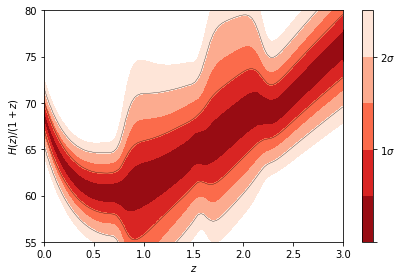

In [3]:
# h(z)/(1+z)
import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'rho_tanh4bins_phy_BBAO+SN_mcmc'

samples, weights = samples_from_getdist_chains(['luis1', 'luis2', 'luis3', 'luis4','Om','h'], file_root)

def PPS(r, theta):
    luis1, luis2, luis3, luis4, Om, h = theta
    #z_i = np.linspace(0,3,len(theta))
    z_i=[0.0,0.8,1.6,2.2]
    #print(len(theta))
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-3):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.1)
    return (h*100*(Om*((1+z)**3)+(w*(1-Om)))**0.5)/(1+z)


z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(55.0,80.0)
plt.ylabel(r'$H(z)/(1+z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
#plt.savefig('h_rho_4bins_BBAO+SN_fgivenx.pdf')

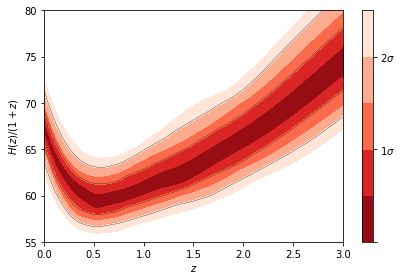

In [9]:
# para el H(z)/(1+z)

import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'rho_tanh_phy_CBAO+HD+SN+bins15_rho_corr_mcmc'

samples, weights = samples_from_getdist_chains(['luis1','luis2','luis3','luis4','luis5','luis6','luis7','luis8',
                                                'luis9','luis10'
                                               ,'luis11','luis12','luis13','luis14','luis15','Om','h'], file_root)

def PPS(r, theta):
    luis1, luis2, luis3, luis4, luis5, luis6, luis7, luis8, luis9, luis10, luis11, luis12, luis13, luis14, luis15, Om, h= theta
    z_i = np.linspace(0.0,3.0,len(theta)-1)
    #z_i=[0.0,0.8,1.6,2.2]
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-3):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.1)
    return (h*100*(Om*((1+z)**3)+(w*(1-Om)))**0.5)/(1+z)

z = np.linspace(0.0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(55.0,80.0)
plt.ylabel(r'$H(z)/(1+z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.savefig('h_rho_15bins_dynesty_zhao_fgivenx.pdf')

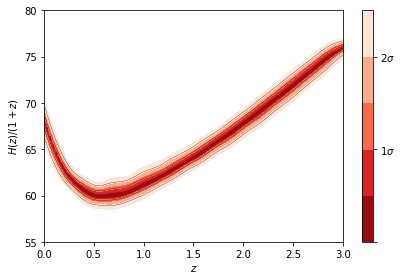

In [4]:
# H(z) con planck y sin planck 10 bins
import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'rho_tanh_phy_rho_corr+HD+SN+CBAO+Planck_nested_dynesty_multi'
#file_root += 'rho_tanh_phy_rho_corr+HD+SN+CBAO_nested_dynesty_multi'

samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'zbin_rho5','zbin_rho6','zbin_rho7','zbin_rho8','zbin_rho9','Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, zbin_rho6, zbin_rho7, zbin_rho8, zbin_rho9, Om, h= theta
    z_i = np.linspace(0.0,3.0,len(theta)-1)
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-3):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.1)
    return (h*100*(Om*((1+z)**3)+(w*(1-Om)))**0.5)/(1+z)


z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(55.,80.)
plt.ylabel(r'$H(z)/(1+z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
#plt.savefig('h_rho_10bins_zhaocorr_dynesty_fgivenx.pdf')

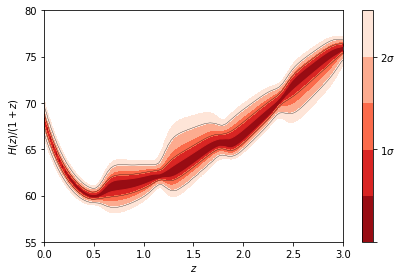

In [3]:
# H(z) con planck y sin planck 5 bins
import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
#file_root += 'rho_tanh5_phy_HD+SN+CBAO_nested_dynesty_multi'
file_root += 'rho_tanh5_phy_HD+SN+CBAO+Planck_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, Om, h= theta
    z_i = np.linspace(0.0,3.0,len(theta)-1)
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-3):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.1)
    return (h*100*(Om*((1+z)**3)+(w*(1-Om)))**0.5)/(1+z)


z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(55.,80.)
plt.ylabel(r'$H(z)/(1+z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.savefig('h_rho_5bins_planck_dynesty_fgivenx.pdf')

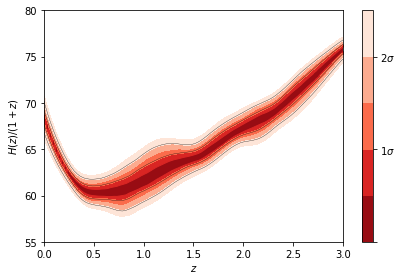

In [7]:
# H(z) con planck 20 bins
import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'rho_tanh20_phy_HD+SN+CBAO+Planck_nested_dynesty_multi'

samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'zbin_rho5','zbin_rho6','zbin_rho7','zbin_rho8','zbin_rho9',
                                                'zbin_rho10','zbin_rho11','zbin_rho12','zbin_rho13','zbin_rho14',
                                                'zbin_rho15','zbin_rho16','zbin_rho17','zbin_rho18','zbin_rho19',
                                                'Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, zbin_rho6, zbin_rho7, zbin_rho8, zbin_rho9,zbin_rho10,zbin_rho11,zbin_rho12,zbin_rho13,zbin_rho14,zbin_rho15,zbin_rho16,zbin_rho17,zbin_rho18,zbin_rho19, Om, h= theta
    z_i = np.linspace(0.0,3.0,len(theta)-1)
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-3):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.2)
    return (h*100*(Om*((1+z)**3)+(w*(1-Om)))**0.5)/(1+z)


z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(55.,80.)
plt.ylabel(r'$H(z)/(1+z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.savefig('h_rho_20bins_planck_dynesty_fgivenx.pdf')

# h(z) solo

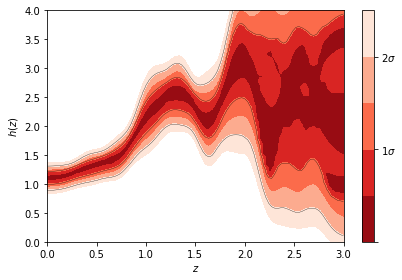

In [6]:
#con 10 bins
import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
#file_root += 'hz_tanh_phy_HD+SN+CBAO_nested_dynesty_multi'
file_root += 'hz_tanh_phy_HD_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_hz0','zbin_hz1','zbin_hz2','zbin_hz3','zbin_hz4',
                                                'zbin_hz5','zbin_hz6','zbin_hz7','zbin_hz8','zbin_hz9',
                                                'Om'], file_root)

def PPS(r, theta):
    zbin_hz0, zbin_hz1, zbin_hz2, zbin_hz3, zbin_hz4, zbin_hz5, zbin_hz6, zbin_hz7, zbin_hz8, zbin_hz9, Om= theta
    z_i = np.linspace(0.0,3.0,len(theta))
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-2):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
    return w

z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Blues_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(0.0, 4.0)
plt.ylabel(r'$h(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
#plt.savefig('hz_10bins_HD_dynesty_fgivenx.pdf')

C:\Users\52811\cosas_python\SimpleMC-master\chains_zhao\hz_tanh15_phy_CBAO+HD+SN_nested_dynesty_multi_1.txt
Removed no burn in


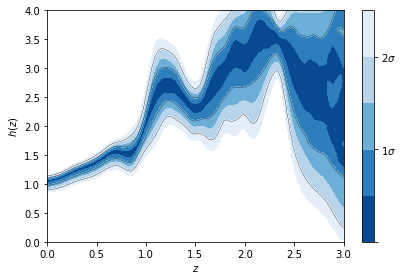

In [11]:
#con 15 bins
import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
#file_root += 'hz_tanh15_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
file_root += 'hz_tanh15_phy_CBAO+HD+SN_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_hz0','zbin_hz1','zbin_hz2','zbin_hz3','zbin_hz4',
                                                'zbin_hz5','zbin_hz6','zbin_hz7','zbin_hz8','zbin_hz9',
                                                'zbin_hz10','zbin_hz11','zbin_hz12','zbin_hz13','zbin_hz14',
                                                'Om'], file_root)

def PPS(r, theta):
    zbin_hz0, zbin_hz1, zbin_hz2, zbin_hz3, zbin_hz4, zbin_hz5, zbin_hz6, zbin_hz7, zbin_hz8, zbin_hz9, zbin_hz10, zbin_hz11, zbin_hz12, zbin_hz13, zbin_hz14, Om= theta
    z_i = np.linspace(0.0,3.0,len(theta))
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-2):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
    return w

z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Blues_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(0.0, 4.0)
plt.ylabel(r'$h(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.savefig('hz_15bins_dynesty.pdf')

# EOS

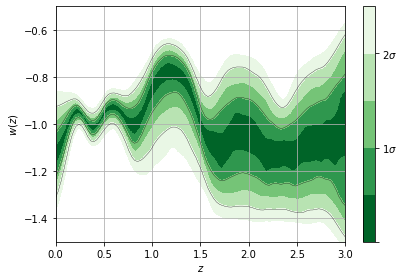

In [2]:
#con 15 bins

import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
#file_root += 'eos_tanh15_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'eos_tanh15_phy_CBAO+HD+SN_nested_dynesty_multi'
file_root += 'eos_tanh20_phy_Pantheon+CBAO+HD_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_eos0','zbin_eos1','zbin_eos2','zbin_eos3','zbin_eos4',
                                                'zbin_eos5','zbin_eos6','zbin_eos7','zbin_eos8','zbin_eos9',
                                                'zbin_eos10','zbin_eos11','zbin_eos12','zbin_eos13','zbin_eos14',
                                                'zbin_eos15','zbin_eos16','zbin_eos17','zbin_eos18','zbin_eos19','Om'], file_root)

def PPS(r, theta):
    zbin_eos0, zbin_eos1, zbin_eos2, zbin_eos3, zbin_eos4, zbin_eos5, zbin_eos6, zbin_eos7, zbin_eos8, zbin_eos9, zbin_eos10, zbin_eos11, zbin_eos12, zbin_eos13, zbin_eos14, zbin_eos15, zbin_eos16, zbin_eos17, zbin_eos18, zbin_eos19, Om= theta
    z_i = np.linspace(0.0,3.0,len(theta))
    #z_i=[0.0,0.8,1.6,2.2]
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-2):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
#    return w
    return w/2.5-0.55

z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights, contour_line_levels=[1,2], colors=plt.cm.Greens_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

lcdm = np.empty(100)
lcdm.fill(-1.)
#plt.plot(z,lcdm, linestyle='--')

plt.xscale('linear')
plt.ylim(-1.5,-0.5)
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid()
#plt.savefig('eos_15bins_dynesty.pdf')

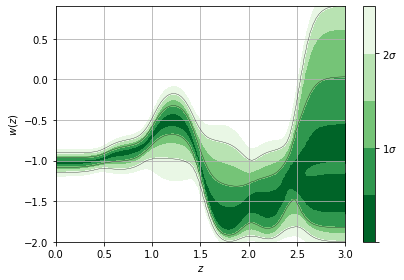

In [2]:
#con 6 bins

import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao_new\\'
file_root += 'eos_tanh6_phy_Pantheon+CBAO+HD_nested_dynesty_multi'

samples, weights = samples_from_getdist_chains(['zbin_eos0','zbin_eos1','zbin_eos2','zbin_eos3','zbin_eos4',
                                                'zbin_eos5','Om'], file_root)

def PPS(r, theta):
    zbin_eos0, zbin_eos1, zbin_eos2, zbin_eos3, zbin_eos4, zbin_eos5, Om= theta
    z_i = np.linspace(0.0,3.0,len(theta))
    #z_i=[0.0,0.8,1.6,2.2]
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-2):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
    return w

z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights, contour_line_levels=[1,2], colors=plt.cm.Greens_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

lcdm = np.empty(100)
lcdm.fill(-1.)
#plt.plot(z,lcdm, linestyle='--')

plt.xscale('linear')
plt.ylim(-2.,0.9)
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid(axis='both')
#plt.savefig('eos_6bins.pdf')

In [ ]:
#con 6 bins

import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'eos_tanh6_phy_CBAO+HD+SN_nested_dynesty_multi'

samples, weights = samples_from_getdist_chains(['zbin_eos0','zbin_eos1','zbin_eos2','zbin_eos3','zbin_eos4',
                                                'zbin_eos5','Om'], file_root)

def PPS(r, theta):
    zbin_eos0, zbin_eos1, zbin_eos2, zbin_eos3, zbin_eos4, zbin_eos5, Om= theta
    z_i = np.linspace(0.0,3.0,len(theta))
    #z_i=[0.0,0.8,1.6,2.2]
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-2):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
    return w

z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights, contour_line_levels=[1,2], colors=plt.cm.Greens_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

lcdm = np.empty(100)
lcdm.fill(-1.)
plt.plot(z,lcdm, linestyle='--')

plt.xscale('linear')
plt.ylim(-3.,0.)
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
#plt.savefig('eos_6bins.pdf')

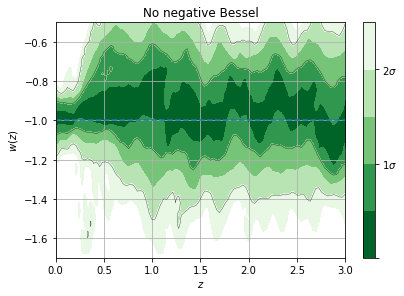

In [9]:
#eos bessel

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SuperMC-github\\simplemc\\chains\\'
file_root += 'besselCDM_phy_HD+CBAO+Pantheon_nested_multi'
#file_root += 'besselCDM_one_negative_phy_HD+CBAO+Pantheon_nested_multi'
#file_root += 'besselCDM_two_negatives_phy_HD+CBAO+Pantheon_nested_multi'



samples, weights = samples_from_getdist_chains(['j0','j1','j2','w1','w2'], file_root)

def PPS(r, theta):
    j0, j1, j2, w1, w2 = theta
    return j0 + sp.jv(j1,w1*r) + sp.jv(j2,w2*r)
    

z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights, contour_line_levels=[1,2], colors=plt.cm.Greens_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

lcdm = np.empty(100)
lcdm.fill(-1.)
plt.plot(z,lcdm, linestyle='--')

plt.xscale('linear')
plt.ylim(-1.7,-0.5)
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.title(r'No negative Bessel')
plt.grid()
plt.savefig('figs_bessel/bessel_no_negative.pdf')

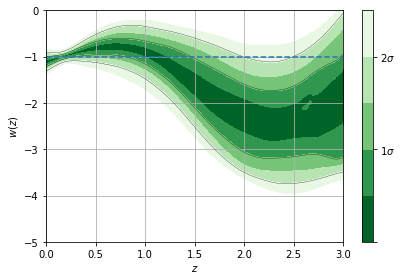

In [32]:
#eos gaussian process

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SuperMC-github\\simplemc\\chains\\'
file_root += 'eos_GP4_phy_HD+Pantheon+CBAO_nested_dynesty_multi'



samples, weights = samples_from_getdist_chains(['zbin_eos0', 'zbin_eos1', 'zbin_eos2', 'zbin_eos3'], file_root)

def PPS(r, theta):
    samples = theta
    y=[]
    for ii in range(len(theta)):
        y.append(theta[ii])
    w_i = np.asarray(y)
    z_i = np.atleast_2d(np.linspace(0.0, 3.0, len(theta))).T

    kernel = RBF(1,(1e-2,1e2))
    #kernel = Matern(length_scale=1.0, nu=1.5)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1, optimizer=None)
    gp.fit(z_i, w_i)
    
    x = np.atleast_2d(np.linspace(0, 3, 100)).T
    #print(r)
    return(gp.predict(x))
    #return(-1)

z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights, contour_line_levels=[1,2], colors=plt.cm.Greens_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

lcdm = np.empty(100)
lcdm.fill(-1.)
plt.plot(z,lcdm, linestyle='--')

plt.xscale('linear')
plt.ylim(-5.0,0.0)
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
#plt.title(r'No negative Bessel')
plt.grid()
#plt.savefig('figs_gp/bessel_no_negative.pdf')

# Om diagnostic

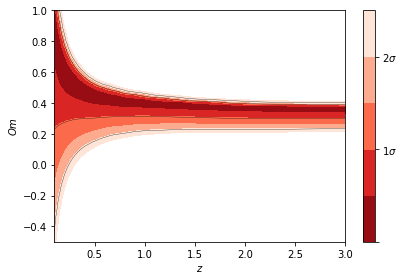

In [8]:
#10 bins
import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'rho_tanh_phy_rho_corr+HD+SN+CBAO+Planck_nested_dynesty_multi'
#file_root += 'rho_tanh_phy_rho_corr+HD+SN+CBAO_nested_dynesty_multi'

samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'zbin_rho5','zbin_rho6','zbin_rho7','zbin_rho8','zbin_rho9','Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, zbin_rho6, zbin_rho7, zbin_rho8, zbin_rho9, Om, h= theta
    z_i = np.linspace(0.0,3.0,len(theta)-1)
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-3):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.1)
    return (Om*((1+z)**3)+(w*(1-Om))-1)/((1+z)**3-1)


z = np.linspace(0.1,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-0.5,1.)
plt.ylabel(r'$Om$')
plt.xlabel(r'$z$')
plt.tight_layout()
#plt.savefig('h_rho_10bins_zhaocorr_dynesty_fgivenx.pdf')

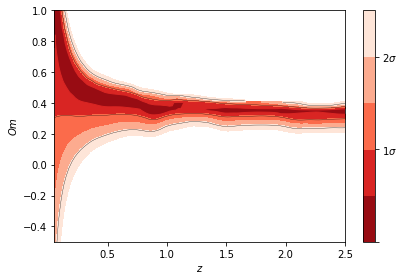

In [8]:
#15 bins
import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
#file_root += 'rho_tanh15_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
file_root += 'rho_tanh15_phy_CBAO+HD+SN_nested_dynesty_multi'

samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'zbin_rho5','zbin_rho6','zbin_rho7','zbin_rho8','zbin_rho9',
                                                'zbin_rho10','zbin_rho11','zbin_rho12','zbin_rho13','zbin_rho14','Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, zbin_rho6, zbin_rho7, zbin_rho8, zbin_rho9, zbin_rho10, zbin_rho11, zbin_rho12, zbin_rho13, zbin_rho14, Om, h= theta
    z_i = np.linspace(0.0,3.0,len(theta)-1)
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-3):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.1)
    return (Om*((1+z)**3)+(w*(1-Om))-1)/((1+z)**3-1)


z = np.linspace(0.05,2.5,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-0.5,1.)
plt.ylabel(r'$Om$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.savefig('om_rho_15bins_dynesty.pdf')

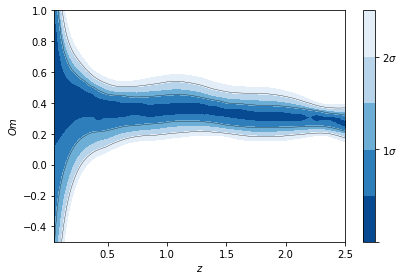

In [13]:
#para hz 15 bins
import numpy as np
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'hz_tanh15_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'hz_tanh15_phy_CBAO+HD+SN_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_hz0','zbin_hz1','zbin_hz2','zbin_hz3','zbin_hz4',
                                                'zbin_hz5','zbin_hz6','zbin_hz7','zbin_hz8','zbin_hz9',
                                                'zbin_hz10','zbin_hz11','zbin_hz12','zbin_hz13','zbin_hz14',
                                                'Om', 'h'], file_root)

def PPS(r, theta):
    zbin_hz0, zbin_hz1, zbin_hz2, zbin_hz3, zbin_hz4, zbin_hz5, zbin_hz6, zbin_hz7, zbin_hz8, zbin_hz9, zbin_hz10, zbin_hz11, zbin_hz12, zbin_hz13, zbin_hz14, Om, h= theta
    z_i = np.linspace(0.0,3.0,len(theta)-1)
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=theta[0]
    for jj in range(len(theta)-3):
        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
    return (w*w-1)/((1+z)**3-1)


z = np.linspace(0.05,2.5,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Blues_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-0.5, 1.0)
plt.ylabel(r'$Om$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.savefig('om_hz_15bins_zhao_dynesty.pdf')

# Deceleration param q

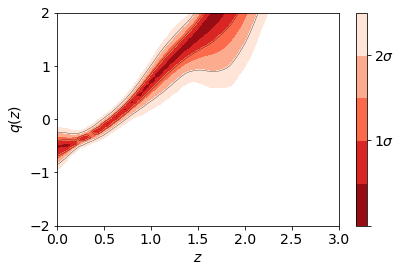

In [31]:
#con 15 bins
#prueba para integral con w(z)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import trapz
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'eos_tanh15_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'

samples, weights = samples_from_getdist_chains(['zbin_eos0','zbin_eos1','zbin_eos2','zbin_eos3','zbin_eos4',
                                                'zbin_eos5','zbin_eos6','zbin_eos7','zbin_eos8','zbin_eos9',
                                                'zbin_eos10','zbin_eos11','zbin_eos12','zbin_eos13','zbin_eos14','Om'], file_root)




def PPS(r, theta):
    zbin_eos0, zbin_eos1, zbin_eos2, zbin_eos3, zbin_eos4, zbin_eos5, zbin_eos6, zbin_eos7, zbin_eos8, zbin_eos9, zbin_eos10, zbin_eos11, zbin_eos12, zbin_eos13, zbin_eos14, Om= theta
    z_i = np.linspace(0.0,3.0,len(theta))
    def luisfunction(z):
        def luisfunction2(z):
            def bines(w_2,w_1,z_2,z_1,eta):
                return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
            w=theta[0]
            for jj in range(len(theta)-2):
                w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
            rhow=w
            return rhow
        rhow=luisfunction2(z)
        resultado = []
        for ii in range(len(z)):
            #resultado += [quad(lambda b: 3.0*(1.0+(luisfunction2(b)))/(1.0+b), 0.0, r[ii] )[0]]
            #resultado += [3.0*(1+trapz([-1,-1],[0,1]))/(1.0+z)]
            resultado += [trapz(3.0*(1.0+(luisfunction2(r[:ii])))/(1.0+r[:ii]),r[:ii])]
        return rhow , resultado
    omDE = (1-Om)*(np.exp(luisfunction(z)[1]))
    return 0.5*Om*((1+z)**3)+(0.5)*(1+3*(luisfunction(z)[0]))*(omDE)


z = np.linspace(0.0,3.0,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-2.,2.)
plt.ylabel(r'$q(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
#plt.savefig('eos_15bins_zhao_dynesty.pdf')

In [2]:
#con 15 bins

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'eos_tanh15_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'eos_tanh15_phy_CBAO+HD+SN_nested_dynesty_multi'

samples, weights = samples_from_getdist_chains(['zbin_eos0','zbin_eos1','zbin_eos2','zbin_eos3','zbin_eos4',
                                                'zbin_eos5','zbin_eos6','zbin_eos7','zbin_eos8','zbin_eos9',
                                                'zbin_eos10','zbin_eos11','zbin_eos12','zbin_eos13','zbin_eos14','Om'], file_root)




#def PPS(r, theta):
#    zbin_eos0, zbin_eos1, zbin_eos2, zbin_eos3, zbin_eos4, zbin_eos5, zbin_eos6, zbin_eos7, zbin_eos8, zbin_eos9, zbin_eos10, zbin_eos11, zbin_eos12, zbin_eos13, zbin_eos14, Om= theta
#    z_i = np.linspace(0.0,3.0,len(theta))
#    def bines(w_2,w_1,z_2,z_1,eta):
#        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
#    w=theta[0]
#    for jj in range(len(theta)-2):
#        w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
#    resultado = quad(lambda b: 3.0*(1.0+1.0)/(1.0+b), 0.0, z )
#    omDE = (1-Om)*(np.exp(resultado[0]))
#    #omDE = (1-Om)
#    return 0.5*Om*((1+z)**3)+0.5*(1+3*(w))*(omDE)


def PPS(r, theta):
    zbin_eos0, zbin_eos1, zbin_eos2, zbin_eos3, zbin_eos4, zbin_eos5, zbin_eos6, zbin_eos7, zbin_eos8, zbin_eos9, zbin_eos10, zbin_eos11, zbin_eos12, zbin_eos13, zbin_eos14, Om= theta
    z_i = np.linspace(0.0,3.0,len(theta))
    def luisfunction(z):
        def luisfunction2(z):
            def bines(w_2,w_1,z_2,z_1,eta):
                return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
            w=theta[0]
            for jj in range(len(theta)-2):
                w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
            rhow=w
            return rhow
        rhow=luisfunction2(z)
        resultado = []
        for ii in range(len(z)):
            resultado += [quad(lambda b: 3.0*(1.0-luisfunction2(b))/(1.0+b), 0.0, r[ii] )[0]]    
        return luisfunction2(z) , resultado
    omDE = (1-Om)*(np.exp(luisfunction(z)[1]))
    return (omDE)


z = np.linspace(0.01,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-2.,2.)
plt.ylabel(r'$q(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
#plt.savefig('eos_15bins_zhao_dynesty.pdf')

KeyboardInterrupt: 


<function PPS at 0x0000023B142E19D8>


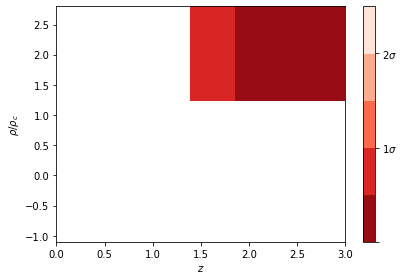

In [79]:
#con planck y sin planck 5 bins
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
#file_root += 'rho_tanh5_phy_HD+SN+CBAO_nested_dynesty_multi'
file_root += 'rho_tanh5_phy_HD+SN+CBAO+Planck_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4','Om'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, Om= theta
    z_i = np.linspace(0.0,3.0,len(theta))
    def luisfunction(r):
        def luisfunction2(r):
            def bines(w_2,w_1,z_2,z_1,eta):
                return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
            w=theta[0]
            for jj in range(len(theta)-2):
                w+=bines(theta[jj+1],theta[jj],z,z_i[jj+1],0.15)
            rhow=w
            return rhow
        rhow=luisfunction2(r)
        resultado = []
        for ii in range(len(r)):
            resultado += [quad(lambda b: 3.0*(1.0+rhow[ii])/(1.0+b), 0.0, r[ii] )[0]]           
        return luisfunction2(z), resultado
    omDE = (1-Om)*(np.exp(luisfunction(z)[1]))
    return 0.5*Om*((1+z)**3)+(0.5)*(1+3*(luisfunction(z)[0]))*(omDE)



z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-1.1,2.8)
plt.ylabel(r'$\rho/\rho_c$')
plt.xlabel(r'$z$')
plt.tight_layout()
print(PPS)
#plt.savefig('rho_5bins_planck_dynesty_fgivenx.pdf')

C:\Users\52811\cosas_python\SimpleMC-master\chains_zhao\rho_tanh15_phy_CBAO+HD+SN_nested_dynesty_multi_1.txt
Removed no burn in


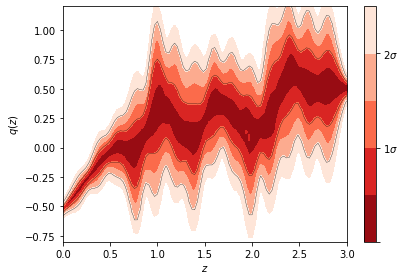

In [2]:
#para rho con 15 bins
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
#file_root += 'rho_tanh15_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
file_root += 'rho_tanh15_phy_CBAO+HD+SN_nested_dynesty_multi'

samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'zbin_rho5','zbin_rho6','zbin_rho7','zbin_rho8','zbin_rho9',
                                                'zbin_rho10','zbin_rho11','zbin_rho12','zbin_rho13','zbin_rho14','Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, zbin_rho6, zbin_rho7, zbin_rho8, zbin_rho9, zbin_rho10, zbin_rho11, zbin_rho12, zbin_rho13, zbin_rho14, Om, h= theta
    z_i = np.linspace(0.0,3.0,len(theta)-1)
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    def hz(r):
        w=theta[0]
        for jj in range(len(theta)-3):
            w+=bines(theta[jj+1],theta[jj],r,z_i[jj+1],0.15)
        return (Om*((1+r)**3)+(w*(1-Om)))**0.5
    dhz = [derivative(hz, ii, dx=1e-6) for ii in r]
    return (1+r)*dhz/hz(r) - 1

z = np.linspace(0.0,3.0,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-0.8,1.2)
plt.ylabel(r'$q(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
#plt.savefig('q_rho_15bins_dynesty.pdf')

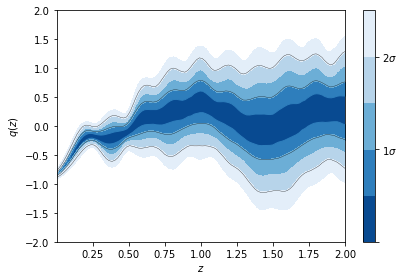

In [17]:
#para hz 15 bins
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'hz_tanh15_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'hz_tanh15_phy_CBAO+HD+SN_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_hz0','zbin_hz1','zbin_hz2','zbin_hz3','zbin_hz4',
                                                'zbin_hz5','zbin_hz6','zbin_hz7','zbin_hz8','zbin_hz9',
                                                'zbin_hz10','zbin_hz11','zbin_hz12','zbin_hz13','zbin_hz14',
                                                'Om', 'h'], file_root)

def PPS(r, theta):
    zbin_hz0, zbin_hz1, zbin_hz2, zbin_hz3, zbin_hz4, zbin_hz5, zbin_hz6, zbin_hz7, zbin_hz8, zbin_hz9, zbin_hz10, zbin_hz11, zbin_hz12, zbin_hz13, zbin_hz14, Om, h= theta
    z_i = np.linspace(0.0,3.0,len(theta)-1)
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    def hz(r):
        w=theta[0]
        for jj in range(len(theta)-3):
            w+=bines(theta[jj+1],theta[jj],r,z_i[jj+1],0.15)
        return w
    dhz = [derivative(hz, ii, dx=1e-6) for ii in r]
    return (1+r)*dhz/hz(r) - 1
    #return (hz(r)*hz(r)-1)/((1+r)**3-1)


z = np.linspace(0.001,2.0,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Blues_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-2.,2.)
plt.ylabel(r'$q(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.savefig('q_hz_15bins_zhao_dynesty.pdf')

In [1]:
import numpy as np
y = np.linspace(0.0,5.,100)
z = np.linspace(0.0,2.5,100)
np.diff(y)/np.diff(z)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [5]:
from scipy.misc import derivative
def f(x):
    r = x**3 + x**2
    return r
derivative(f, 1.0, dx=1e-2)

5.000099999999996

# Nodal

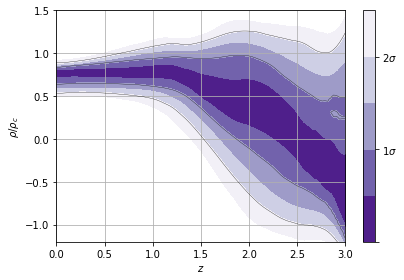

In [30]:
#con planck y sin planck 4 nodos y 2 nodos en medio
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'nodal_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'nodal_phy_CBAO+HD+SN+Planck_nested_dynesty_multi'
#file_root += 'nodal_cubic_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'nodal_cubic_phy_CBAO+HD+SN+Planck_nested_dynesty_multi'

samples, weights = samples_from_getdist_chains(['luis71','luis72','luis73','luis74','w72', 'w73','Om'], file_root)

def PPS(r, theta):
    luis71, luis72, luis73, luis74, w72, w73, Om= theta
    y = [luis71, luis72, luis73, luis74]
    x = [0.0, w72, w73, 3.0]
    f = interp1d(x, y, kind='linear')
    rhow = f(r)
    return rhow*(1-Om)



z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Purples_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-1.2,1.5)
plt.ylabel(r'$\rho/\rho_c$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid(axis = 'both')
plt.savefig('rho_4nodalxy_dynesty.pdf')

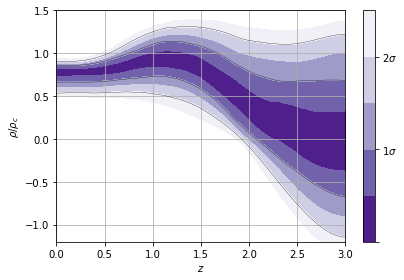

In [20]:
#15 nodos con y sin correlacion 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'rho_nodal_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_tanh15_eta0_distinct_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'zbin_rho5','zbin_rho6','zbin_rho7','zbin_rho8','zbin_rho9',
                                                'zbin_rho10','zbin_rho11','zbin_rho12','zbin_rho13','zbin_rho14','Om'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, zbin_rho6, zbin_rho7, zbin_rho8, zbin_rho9, zbin_rho10, zbin_rho11, zbin_rho12, zbin_rho13, zbin_rho14, Om= theta
    y=[]
    for ii in range(len(theta)-1):
        y.append(theta[ii])
    x = np.linspace(0.0,3.0, len(theta)-1)
    f = interp1d(x, y, kind='cubic')
    rhow = f(r)
    return rhow*(1-Om)



z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Purples_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-1.2,1.5)
plt.ylabel(r'$\rho/\rho_c$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid(axis = 'both')
#plt.savefig('rho_15nodal_zhao_dynesty.pdf')

C:\Users\52811\cosas_python\SimpleMC-master\chains_zhao\rho_nodal5_phy_CBAO+HD+SN_nested_dynesty_multi_1.txt
Removed no burn in


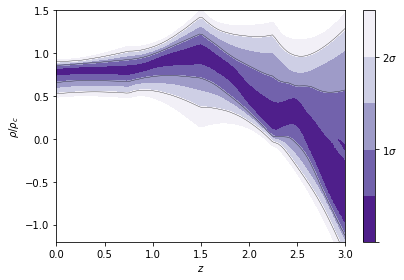

In [11]:
#5 nodos
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'rho_nodal5_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal5_phy_CBAO+HD+SN_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'Om'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, Om= theta
    y=[]
    for ii in range(len(theta)-1):
        y.append(theta[ii])
    x = np.linspace(0.0,3.0, len(theta)-1)
    f = interp1d(x, y, kind='linear')
    rhow = f(r)
    return rhow*(1-Om)



z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Purples_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-1.2,1.5)
plt.ylabel(r'$\rho/\rho_c$')
plt.xlabel(r'$z$')
plt.tight_layout()
#plt.savefig('rho_15nodal_zhao_dynesty.pdf')

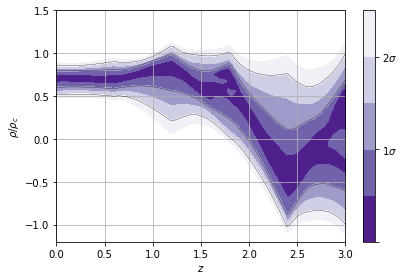

In [21]:
#6 nodos
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
#file_root += 'rho_nodal6_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal6_phy_CBAO+HD+SN_nested_dynesty_multi'
file_root += 'rho_nodal6_lastpoint_phy_CBAO+HD+SN_nested_dynesty_multi'



samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4','zbin_rho5',
                                                'Om'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, Om= theta
    y=[]
    for ii in range(len(theta)-1):
        y.append(theta[ii])
    x = np.linspace(0.0,3.0, len(theta)-1)
    f = interp1d(x, y, kind='linear')
    rhow = f(r)
    return rhow*(1-Om)



z = np.linspace(0.0,3.0,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Purples_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-1.2,1.5)
plt.ylabel(r'$\rho/\rho_c$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid(axis = 'both')
plt.savefig('rho_6nodal_dynesty.pdf')

C:\Users\52811\cosas_python\SimpleMC-master\chains_zhao\eos_nodal_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi_1.txt
Removed no burn in


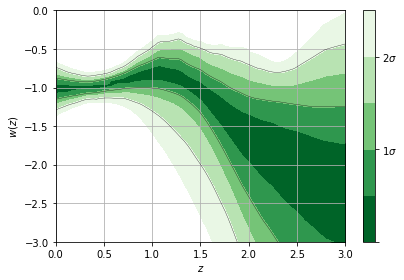

In [61]:
#EOS con 15 nodos

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'eos_nodal_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'eos_nodal15_phy_CBAO+HD+SN_nested_dynesty_multi'

samples, weights = samples_from_getdist_chains(['zbin_eos0','zbin_eos1','zbin_eos2','zbin_eos3','zbin_eos4',
                                                'zbin_eos5','zbin_eos6','zbin_eos7','zbin_eos8','zbin_eos9',
                                                'zbin_eos10','zbin_eos11','zbin_eos12','zbin_eos13','zbin_eos14','Om'], file_root)

def PPS(r, theta):
    zbin_eos0, zbin_eos1, zbin_eos2, zbin_eos3, zbin_eos4, zbin_eos5, zbin_eos6, zbin_eos7, zbin_eos8, zbin_eos9, zbin_eos10, zbin_eos11, zbin_eos12, zbin_eos13, zbin_eos14, Om= theta
    y=[]
    for ii in range(len(theta)-1):
        y.append(theta[ii])
    x = np.linspace(0.0,3.0, len(theta)-1)
    f = interp1d(x, y, kind='linear')
    rhow = f(r)
    return rhow

z = np.linspace(0,3,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Greens_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-3.,0.)
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid()
plt.savefig('eos_15nodal_zhao.pdf')

# Reconst. derivadas para 6 nodos/bins

In [16]:
#6 nodos q
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.misc import derivative
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
#file_root += 'rho_nodal6_priorredux_phy_CBAO+HD+SN_nested_dynesty_multi'
file_root += 'rho_nodal6_priorredux3_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal6_priorredux4_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal6_priorredux3_lastpoint_phy_CBAO+HD+SN_nested_dynesty_multi'

#file_root += 'rho_nodal6_priorredux_signswitch_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal6_phy_CBAO+HD+SN_nested_dynesty_multi'



samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'zbin_rho5','Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, Om, h= theta
    y=[]
    x = np.linspace(0.0,3.0, len(theta)-2)
    for ii in range(len(theta)-2):
        y.append(theta[ii])
    def hz(r):
        f = interp1d(x, y, kind='cubic')
        rhow = f(r)
        return (Om*((1+r)**3)+(rhow*(1-Om)))**0.5
    dhz = [derivative(hz, ii, dx=1e-6) for ii in r]
    return (1+r)*dhz/hz(r) - 1
    #return hz(r)

z = np.linspace(0.001,2.999,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2],colors=plt.cm.Blues_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


def q(x):
    def hlcdm(x2):
        return (0.3*((1+x2)**3)+(0.7))**0.5
    dhlcdm = derivative(hlcdm, x, dx=1e-6)
    return (1+x)*dhlcdm/hlcdm(x) - 1
lcdm =[]
for ii in range(100):
    lcdm+=[q(z[ii])]
plt.plot(z,lcdm, linestyle='--', color='k')

plt.xscale('linear')
plt.ylim(-0.8,1.2)
plt.ylabel(r'$q(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.savefig('q_rho_6nodal.pdf')

0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1


KeyboardInterrupt: 

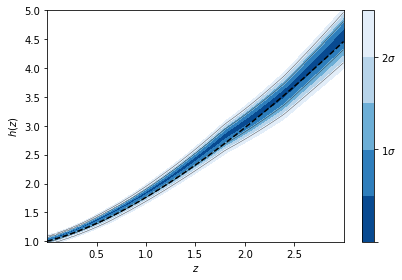

In [2]:
#6 nodos h(z)
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.misc import derivative
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
#file_root += 'rho_nodal6_priorredux_phy_CBAO+HD+SN_nested_dynesty_multi'
file_root += 'rho_nodal6_priorredux3_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal6_priorredux4_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal6_priorredux3_lastpoint_phy_CBAO+HD+SN_nested_dynesty_multi'

#file_root += 'rho_nodal6_priorredux_signswitch_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal6_phy_CBAO+HD+SN_nested_dynesty_multi'



samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'zbin_rho5','Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, Om, h= theta
    y=[]
    x = np.linspace(0.0,3.0, len(theta)-2)
    for ii in range(len(theta)-2):
        y.append(theta[ii])
    def hz(r):
        f = interp1d(x, y, kind='linear')
        rhow = f(r)
        return (Om*((1+r)**3)+(rhow*(1-Om)))**0.5
    return hz(r)

z = np.linspace(0.001,2.999,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Blues_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.empty(100)
lcdm.fill(0.3)
plt.plot(z,(0.3*((1+z)**3)+(0.7))**0.5, linestyle='--', color='k')


plt.xscale('linear')
plt.ylim(0.99,5)
plt.ylabel(r'$h(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.savefig('h_rho_6nodal.pdf')

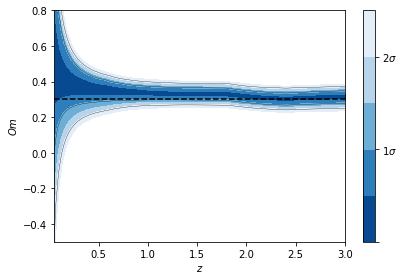

In [32]:
#6 nodos h(z)
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.misc import derivative
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
#file_root += 'rho_nodal6_priorredux_phy_CBAO+HD+SN_nested_dynesty_multi'
file_root += 'rho_nodal6_priorredux3_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal6_priorredux4_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal6_priorredux3_lastpoint_phy_CBAO+HD+SN_nested_dynesty_multi'

#file_root += 'rho_nodal6_priorredux_signswitch_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal6_phy_CBAO+HD+SN_nested_dynesty_multi'



samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'zbin_rho5','Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, Om, h= theta
    y=[]
    x = np.linspace(0.001,3.0, len(theta)-2)
    for ii in range(len(theta)-2):
        y.append(theta[ii])
    f = interp1d(x, y, kind='linear')
    rhow = f(r)
    return (Om*((1+r)**3)+(f(r)*(1-Om))-1)/((1+r)**3-1)


z = np.linspace(0.05,3.0,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Blues_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.empty(100)
lcdm.fill(0.3)
plt.plot(z,lcdm, linestyle='--', color='k')

plt.xscale('linear')
plt.ylim(-0.5,0.8)
plt.ylabel(r'$Om$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.savefig('om_rho_6nodal.pdf')

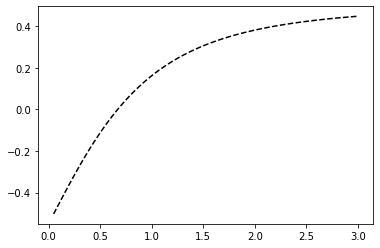

In [45]:
z = np.linspace(0.05,3.0,100)
def q(x):
    def hlcdm(x2):
        return (0.3*((1+x2)**3)+(0.7))**0.5
    dhlcdm = derivative(hlcdm, x, dx=1e-6)
    return (1+x)*dhlcdm/hlcdm(x) - 1

lcdm =[]
for ii in range(100):
    lcdm+=[q(z[ii])]

plt.plot(z,lcdm, linestyle='--', color='k')


# Rho punto

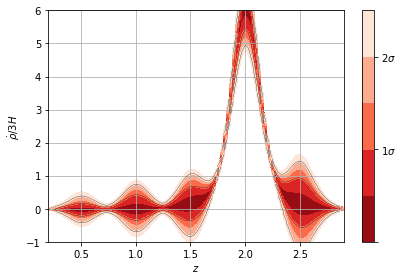

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'rho_tanh6_priorredux_signswitch_phy_CBAO+HD+SN_nested_dynesty_multi'



samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4','zbin_rho5','Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, Om, h= theta
    z_i = np.linspace(0.0,3.0,len(theta)-1)
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    def rho(r):
        w=theta[0]
        for jj in range(len(theta)-3):
            w+=bines(theta[jj+1],theta[jj],r,z_i[jj+1],0.17)
        return w
    drho = [derivative(rho, ii, dx=1e-6) for ii in r]
    return -(1+r)*drho/3.0

z = np.linspace(0.2,2.9,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-1.,6.)
plt.ylabel(r'$\dot{\rho}/3H$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid(axis = 'both')
plt.savefig('dotrho_6bins_priorsignswitch.pdf')

# Reconst. derivadas para 15 nodos/bins

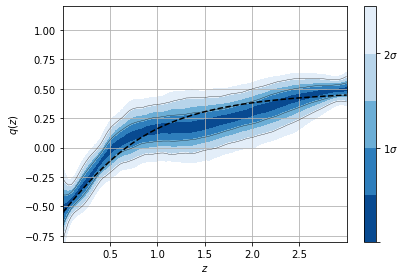

In [5]:
#15 nodos con y sin correlacion 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.misc import derivative
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'rho_nodal_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_tanh15_eta0_distinct_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'zbin_rho5','zbin_rho6','zbin_rho7','zbin_rho8','zbin_rho9',
                                                'zbin_rho10','zbin_rho11','zbin_rho12','zbin_rho13','zbin_rho14','Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, zbin_rho6, zbin_rho7, zbin_rho8, zbin_rho9, zbin_rho10, zbin_rho11, zbin_rho12, zbin_rho13, zbin_rho14, Om, h= theta
    y=[]
    x = np.linspace(0.0,3.0, len(theta)-2)
    for ii in range(len(theta)-2):
        y.append(theta[ii])
    def hz(r):
        f = interp1d(x, y, kind='cubic')
        rhow = f(r)
        return (Om*((1+r)**3)+(rhow*(1-Om)))**0.5
    dhz = [derivative(hz, ii, dx=1e-6) for ii in r]
    return (1+r)*dhz/hz(r) - 1
    #return hz(r)

z = np.linspace(0.001,2.999,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2],colors=plt.cm.Blues_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


def q(x):
    def hlcdm(x2):
        return (0.3*((1+x2)**3)+(0.7))**0.5
    dhlcdm = derivative(hlcdm, x, dx=1e-6)
    return (1+x)*dhlcdm/hlcdm(x) - 1
lcdm =[]
for ii in range(100):
    lcdm+=[q(z[ii])]
plt.plot(z,lcdm, linestyle='--', color='k')

plt.xscale('linear')
plt.ylim(-0.8,1.2)
plt.ylabel(r'$q(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid()
plt.savefig('q_rho_15nodal_zhao.pdf')

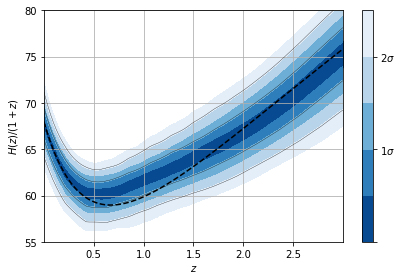

In [7]:
#15 nodos con y sin correlacion 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.misc import derivative
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'rho_nodal_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_tanh15_eta0_distinct_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'zbin_rho5','zbin_rho6','zbin_rho7','zbin_rho8','zbin_rho9',
                                                'zbin_rho10','zbin_rho11','zbin_rho12','zbin_rho13','zbin_rho14','Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, zbin_rho6, zbin_rho7, zbin_rho8, zbin_rho9, zbin_rho10, zbin_rho11, zbin_rho12, zbin_rho13, zbin_rho14, Om, h= theta
    y=[]
    x = np.linspace(0.0,3.0, len(theta)-2)
    for ii in range(len(theta)-2):
        y.append(theta[ii])
    f = interp1d(x, y, kind='linear')
    rhow = f(r)
    return (h*100*(Om*((1+z)**3)+(rhow*(1-Om)))**0.5)/(1+z)


z = np.linspace(0.001,2.999,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Blues_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.empty(100)
lcdm.fill(0.3)
plt.plot(z,(68*(0.3*((1+z)**3)+(0.7))**0.5)/(1+z), linestyle='--', color='k')


plt.xscale('linear')
plt.ylim(55.0,80.0)
plt.ylabel(r'$H(z)/(1+z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid()
plt.savefig('h_rho_15nodal_zhao.pdf')

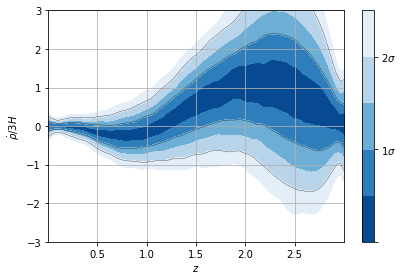

In [21]:
#15 nodos con y sin correlacion 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.misc import derivative
from fgivenx import plot_contours, samples_from_getdist_chains

file_root = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_zhao\\'
file_root += 'rho_nodal_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_nodal_phy_CBAO+HD+SN_nested_dynesty_multi'
#file_root += 'rho_tanh15_eta0_distinct_phy_rho_corr+CBAO+HD+SN_nested_dynesty_multi'


samples, weights = samples_from_getdist_chains(['zbin_rho0','zbin_rho1','zbin_rho2','zbin_rho3','zbin_rho4',
                                                'zbin_rho5','zbin_rho6','zbin_rho7','zbin_rho8','zbin_rho9',
                                                'zbin_rho10','zbin_rho11','zbin_rho12','zbin_rho13','zbin_rho14','Om','h'], file_root)

def PPS(r, theta):
    zbin_rho0, zbin_rho1, zbin_rho2, zbin_rho3, zbin_rho4, zbin_rho5, zbin_rho6, zbin_rho7, zbin_rho8, zbin_rho9, zbin_rho10, zbin_rho11, zbin_rho12, zbin_rho13, zbin_rho14, Om, h= theta
    y=[]
    x = np.linspace(0.0,3.0, len(theta)-2)
    for ii in range(len(theta)-2):
        y.append(theta[ii])
    def rho(r):
        f = interp1d(x, y, kind='cubic')
        rhow = f(r)
        return rhow 
    drho = [derivative(rho, ii, dx=1e-6) for ii in r]
    return -(1+r)*drho/3.0

z = np.linspace(0.001,2.999,100)
cbar = plot_contours(PPS, z, samples, weights=weights,contour_line_levels=[1,2], colors=plt.cm.Blues_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

plt.xscale('linear')
plt.ylim(-3.,3.)
plt.ylabel(r'$\dot{\rho}/3H$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.grid()
plt.savefig('dotrho_15nodal_zhao.pdf')

# Calculadora de AIC, BIC

In [2]:
#aic = 2k-2lnL
#bic = klnn-2lnL
#k son los params y n los datos
import numpy as np

k=3+6
loglike=-27.762
n=81

def aic(k,loglike):
    return 2*k-2*loglike
def bic(k,n,loglike):
    return k*np.log(n)-2*loglike

aic_base= aic(3,-29.839)
bic_base= bic(3,n,-29.839)

print(aic(k,loglike)-aic_base,'&',bic(k,n,loglike)-bic_base)

7.846000000000004 & 22.212694928034637


# Grafica de logz y chi2

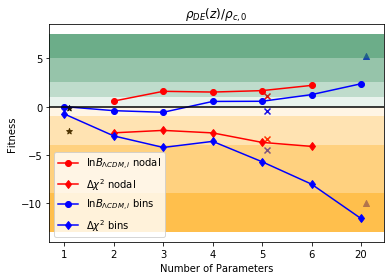

In [3]:
#para rho zhao_new

import matplotlib.pyplot as plt
import numpy as np

lcdm = [530.791,525.378]

foury2x_nodal = [531.903,523.687]
foury2x_tanh  = [530.297,523.243]
tanh20_corr   = [535.997,520.394]
sigmoid       = [530.667,524.097]

nodal = {#1:[531.496,525.380],
         2:[531.363,524.016],
         3:[532.373,524.143],
         4:[532.295,524.012],
         5:[532.444,523.520],
         6:[532.985,523.313]}

tanh = {1:[530.784,524.991],
        2:[530.365,523.854],
        3:[530.199,523.258],
        4:[531.323,523.573],
        5:[531.339,522.516],
        6:[532.028,521.356],
        7:[533.153,519.576]#este es el de 20
       }



x=[]
y1=[]
y2=[]
for i in nodal:
    x += [i]
    y1 += [nodal[i][0] - lcdm[0]]
    y2 += [nodal[i][1]*(2.) + lcdm[1]*(-2.)]
    
l=[]
k1=[]
k2=[]
for i in tanh:
    l += [i]
    k1 += [tanh[i][0] - lcdm[0]]
    k2 += [tanh[i][1]*(2.) + lcdm[1]*(-2.)]
    
#4y2x
h=[5.1,5.1]
m1=[foury2x_nodal[0] - lcdm[0],foury2x_nodal[1]*(2.)+ lcdm[1]*(-2.)]
m2=[foury2x_tanh[0] - lcdm[0],foury2x_tanh[1]*(2.)+ lcdm[1]*(-2.)-0.2]
  
    
#sigmoid
h_sigmoid=[1.1,1.1]
m1_sigmoid=[sigmoid[0] - lcdm[0],sigmoid[1]*(2.)+ lcdm[1]*(-2.)]
      

#corr_func
h_corr=[7.1,7.1]
m1_corr=[tanh20_corr[0] - lcdm[0],tanh20_corr[1]*(2.)+ lcdm[1]*(-2.)]
    
    
fig, ax = plt.subplots()
ax.axhspan(0, 1, facecolor='seagreen', alpha=0.1)
ax.axhspan(1, 2.5, facecolor='seagreen', alpha=0.3)
ax.axhspan(2.5, 5, facecolor='seagreen', alpha=0.5)
ax.axhspan(5, 7.5, facecolor='seagreen', alpha=0.7)
ax.axhspan(-9, -13, facecolor='orange', alpha=0.7)
ax.axhspan(-9,-4, facecolor='orange', alpha=0.5)
ax.axhspan(-4, -1, facecolor='orange', alpha=0.3)
ax.axhspan(-1, 0, facecolor='orange', alpha=0.1)
        
    
example = np.linspace(1,7.3,100)
y3=np.zeros(len(example))

#plt.legend([r'4y2x nodal',r'4y2x tanh'])

plt.rc('font', size=10)
plt.scatter(h_sigmoid,m1_sigmoid,marker='*',c='k')
plt.plot(x,y1,marker='o',c='r')
plt.plot(x,y2,marker='d',c='r')
plt.scatter(h,m1,marker='x',c='r')
plt.plot(l,k1,marker='o',c='b')
plt.plot(l,k2,marker='d',c='b')
plt.scatter(h,m2,marker='x',c='b')
plt.scatter(h_corr,m1_corr,marker='^',c='b')
ticks = np.arange(4, 16, 1)
plt.xticks(ticks=l,labels=['1','2','3','4','5','6','20'])
plt.xlabel(r'Number of Parameters')
plt.ylabel('Fitness')
plt.rc('font', size=10)
#plt.legend([r'$\ln{B_{12}}$ nodal',r'$\Delta \chi^2$ nodal',
#            r'$\ln{B_{12}}$ tanh',r'$\Delta \chi^2$ tanh',r'4y2x nodal',r'4y2x tanh']
#            )
plt.axhline(y=0., color='k', linestyle='-')
#plt.plot(example,y3-1,linestyle='--',c='k')
#plt.plot(example,y3-4,linestyle='--',c='k')
#plt.plot(example,y3+1,linestyle=':',c='k')
#plt.plot(example,y3+2.5,linestyle=':',c='k')
#plt.plot(example,y3+5,linestyle=':',c='k')
plt.title(label=r'$\rho_{DE}(z)/\rho_{c,0}$')
plt.legend([r'$\ln B_{\Lambda CDM,i}$ nodal',r'$\Delta \chi^2$ nodal',
            r'$\ln B_{\Lambda CDM,i}$ bins',r'$\Delta \chi^2$ bins'])
#plt.savefig('figs_full_panth/graph_fitness_full_panth.pdf')
plt.savefig('figs_full_panth/graph_fitness_full_panth_semaforo.pdf')

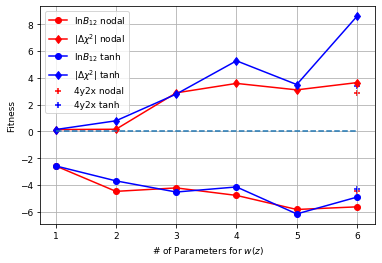

In [2]:
#para eos zhao_new

import matplotlib.pyplot as plt
import numpy as np

lcdm = [-530.791,-525.378]

foury2x_nodal = [-535.204,-523.950]
foury2x_tanh = [-535.087,-523.583]

nodal = {1:[-533.359,-525.306],
         2:[-535.259,-525.295],
         3:[-535.001,-523.936],
         4:[-535.561,-523.584],
         5:[-536.611,-523.825],
         6:[-536.414,-523.554]}

tanh = {1:[-533.359,-525.306],
        2:[-534.476,-524.979],
        3:[-535.309,-523.983],
        4:[-534.929,-522.741],
        5:[-536.942,-523.627],
        6:[-535.687,-521.078]}

x=[]
y1=[]
y2=[]
for i in nodal:
    x += [i]
    y1 += [nodal[i][0] - lcdm[0]]
    y2 += [nodal[i][1]*(2.) + lcdm[1]*(-2.)]
    
l=[]
k1=[]
k2=[]
for i in tanh:
    l += [i]
    k1 += [tanh[i][0] - lcdm[0]]
    k2 += [tanh[i][1]*(2.) + lcdm[1]*(-2.)]
    

h=[6,6]
m1=[foury2x_nodal[0] - lcdm[0],foury2x_nodal[1]*(2.)+ lcdm[1]*(-2.)]
m2=[foury2x_tanh[0] - lcdm[0],foury2x_tanh[1]*(2.)+ lcdm[1]*(-2.)-0.2]
    
    
example = np.linspace(1,6,100)
y3=np.zeros(len(example))

plt.grid(axis = 'both')
plt.legend([r'4y2x nodal',r'4y2x tanh'])

plt.plot(x,y1,marker='o',c='r')
plt.plot(x,y2,marker='d',c='r')
plt.scatter(h,m1,marker='+',c='r')
plt.plot(l,k1,marker='o',c='b')
plt.plot(l,k2,marker='d',c='b')
plt.scatter(h,m2,marker='+',c='b')
ticks = np.arange(4, 16, 1)
plt.xticks(x)
plt.xlabel(r'# of Parameters for $w (z)$')
plt.ylabel('Fitness')
plt.legend([r'$\ln{B_{12}}$ nodal',r'$|\Delta \chi^2|$ nodal',
            r'$\ln{B_{12}}$ tanh',r'$|\Delta \chi^2|$ tanh',r'4y2x nodal',r'4y2x tanh']
            )
plt.plot(example,y3,linestyle='--')
plt.savefig('figs_full_panth/graph_fitness_full_panth_eos.pdf')

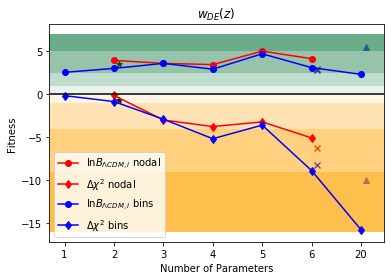

In [5]:
#para eos zhao_new con prior reducidos [0.0,-2.5]

import matplotlib.pyplot as plt
import numpy as np

lcdm = [530.791,525.378]

foury2x_nodal = [533.804,522.266]
foury2x_tanh  = [533.658,521.365]
cpl           = [534.335,525.037]
tanh20_corr   = [536.315,520.390]

nodal = {#1:[533.359,525.306],
         2:[534.752,525.318],
         3:[534.403,523.888],
         4:[534.258,523.508],
         5:[535.824,523.779],
         6:[534.949,522.846]}

tanh = {1:[533.359,525.306],
        2:[533.817,524.961],
        3:[534.398,523.936],
        4:[533.724,522.800],
        5:[535.518,523.591],
        6:[533.906,520.945],
        7:[533.124,517.504]#este es el de 20
       }

x=[]
y1=[]
y2=[]
for i in nodal:
    x += [i]
    y1 += [nodal[i][0] - lcdm[0]]
    y2 += [nodal[i][1]*(2.) + lcdm[1]*(-2.)]
    
l=[]
k1=[]
k2=[]
for i in tanh:
    l += [i]
    k1 += [tanh[i][0] - lcdm[0]]
    k2 += [tanh[i][1]*(2.) + lcdm[1]*(-2.)]
    

#labels=['1','2','3','4','5','6','20']

#4y2x
h=[6.1,6.1]
m1=[foury2x_nodal[0] - lcdm[0],foury2x_nodal[1]*(2.)+ lcdm[1]*(-2.)]
m2=[foury2x_tanh[0] - lcdm[0],foury2x_tanh[1]*(2.)+ lcdm[1]*(-2.)-0.2]

#cpl
h_cpl=[2.1,2.1]
m1_cpl=[cpl[0] - lcdm[0],cpl[1]*(2.)+ lcdm[1]*(-2.)]

#corr_func
h_corr=[7.1,7.1]
m1_corr=[tanh20_corr[0] - lcdm[0],tanh20_corr[1]*(2.)+ lcdm[1]*(-2.)]
    
    
fig, ax = plt.subplots()
ax.axhspan(0, 1, facecolor='seagreen', alpha=0.1)
ax.axhspan(1, 2.5, facecolor='seagreen', alpha=0.3)
ax.axhspan(2.5, 5, facecolor='seagreen', alpha=0.5)
ax.axhspan(5, 7, facecolor='seagreen', alpha=0.7)
ax.axhspan(-9, -16, facecolor='orange', alpha=0.7)
ax.axhspan(-9,-4, facecolor='orange', alpha=0.5)
ax.axhspan(-4, -1, facecolor='orange', alpha=0.3)
ax.axhspan(-1, 0, facecolor='orange', alpha=0.1)
    
example = np.linspace(1,7.3,100)
y3=np.zeros(len(example))

#plt.legend([r'4y2x nodal',r'4y2x tanh'])

plt.rc('font', size=10)
plt.scatter(h_cpl,m1_cpl,marker='*',c='k')
plt.plot(x,y1,marker='o',c='r')
plt.plot(x,y2,marker='d',c='r')
plt.scatter(h,m1,marker='x',c='r')
plt.plot(l,k1,marker='o',c='b')
plt.plot(l,k2,marker='d',c='b')
plt.scatter(h,m2,marker='x',c='b')
plt.scatter(h_corr,m1_corr,marker='^',c='b')
#ticks = np.arange(4, 16, 1)
plt.rc('font', size=10)
plt.xticks(ticks=l,labels=['1','2','3','4','5','6','20'])
plt.xlabel(r'Number of Parameters')
plt.ylabel('Fitness')
#plt.legend([r'$\ln{B_{12}}$ nodal',r'$\Delta \chi^2$ nodal',
#            r'$\ln{B_{12}}$ tanh',r'$\Delta \chi^2$ tanh',r'4y2x nodal',r'4y2x tanh']
#            )
plt.axhline(y=0., color='k', linestyle='-')
#plt.plot(example,y3-1,linestyle='--',c='k')
#plt.plot(example,y3-4,linestyle='--',c='k')
#plt.plot(example,y3-9,linestyle='--',c='k')
#plt.plot(example,y3+5,linestyle=':',c='k')
#plt.plot(example,y3+1,linestyle=':',c='k')
#plt.plot(example,y3+2.5,linestyle=':',c='k')
plt.title(label=r'$w_{DE}(z)$')
plt.legend([r'$\ln B_{\Lambda CDM,i}$ nodal',r'$\Delta \chi^2$ nodal',
            r'$\ln B_{\Lambda CDM,i}$ bins',r'$\Delta \chi^2$ bins'])

#plt.savefig('figs_full_panth/graph_fitness_full_panth_eos_reduced_prior.pdf')
plt.savefig('figs_full_panth/graph_fitness_full_panth_eos_reduced_prior_semaforo.pdf')

# Las graficas de arriba pero separadas

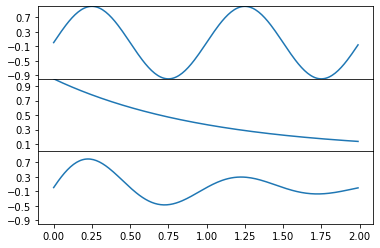

In [2]:
#ejemplo para que compartan eje x
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)

s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = s1 * s2

fig, axs = plt.subplots(3, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)
axs[0].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[0].set_ylim(-1, 1)

axs[1].plot(t, s2)
axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[1].set_ylim(0, 1)

axs[2].plot(t, s3)
axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
axs[2].set_ylim(-1, 1)

plt.show()

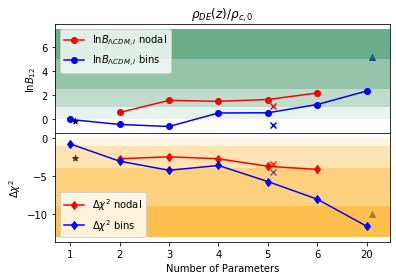

In [40]:
#para rho zhao_new

import matplotlib.pyplot as plt
import numpy as np

lcdm = [530.791,525.378]

foury2x_nodal = [531.903,523.687]
foury2x_tanh  = [530.297,523.243]
tanh20_corr   = [535.997,520.394]
sigmoid       = [530.667,524.097]

nodal = {#1:[531.496,525.380],
         2:[531.363,524.016],
         3:[532.373,524.143],
         4:[532.295,524.012],
         5:[532.444,523.520],
         6:[532.985,523.313]}

tanh = {1:[530.784,524.991],
        2:[530.365,523.854],
        3:[530.199,523.258],
        4:[531.323,523.573],
        5:[531.339,522.516],
        6:[532.028,521.356],
        7:[533.153,519.576]#este es el de 20
       }

x=[]
y1=[]
y2=[]
for i in nodal:
    x += [i]
    y1 += [nodal[i][0] - lcdm[0]]
    y2 += [nodal[i][1]*(2.) + lcdm[1]*(-2.)]
    
l=[]
k1=[]
k2=[]
for i in tanh:
    l += [i]
    k1 += [tanh[i][0] - lcdm[0]]
    k2 += [tanh[i][1]*(2.) + lcdm[1]*(-2.)]
    
#4y2x
h=[5.1,5.1]
m1=[foury2x_nodal[0] - lcdm[0],foury2x_nodal[1]*(2.)+ lcdm[1]*(-2.)]
m2=[foury2x_tanh[0] - lcdm[0],foury2x_tanh[1]*(2.)+ lcdm[1]*(-2.)-0.2]
   
#sigmoid
h_sigmoid=[1.1,1.1]
m1_sigmoid=[sigmoid[0] - lcdm[0],sigmoid[1]*(2.)+ lcdm[1]*(-2.)]
      
#corr_func
h_corr=[7.1,7.1]
m1_corr=[tanh20_corr[0] - lcdm[0],tanh20_corr[1]*(2.)+ lcdm[1]*(-2.)]
   

plt.rc('font', size=10)

fig, ax = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0)

ax[0].axhspan(0, 1, facecolor='seagreen', alpha=0.1)
ax[0].axhspan(1, 2.5, facecolor='seagreen', alpha=0.3)
ax[0].axhspan(2.5, 5, facecolor='seagreen', alpha=0.5)
ax[0].axhspan(5, 7.5, facecolor='seagreen', alpha=0.7)

ax[1].axhspan(-9, -13, facecolor='orange', alpha=0.7)
ax[1].axhspan(-9,-4, facecolor='orange', alpha=0.5)
ax[1].axhspan(-4, -1, facecolor='orange', alpha=0.3)
ax[1].axhspan(-1, 0, facecolor='orange', alpha=0.1)
        
for ii in [0,1]:
    ax[ii].scatter(h_sigmoid[ii],m1_sigmoid[ii],marker='*',c='k')
    ax[ii].scatter(h[ii],m2[ii],marker='x',c='b')
    ax[ii].scatter(h_corr[ii],m1_corr[ii],marker='^',c='b')
    ax[ii].scatter(h[ii],m1[ii],marker='x',c='r')
    if ii == 0:
        ax[ii].plot(x,y1,marker='o',c='r')
        ax[ii].plot(l,k1,marker='o',c='b')
    if ii == 1:
        ax[ii].plot(x,y2,marker='d',c='r')
        ax[ii].plot(l,k2,marker='d',c='b')
    

ticks = np.arange(4, 16, 1)
plt.xticks(ticks=l,labels=['1','2','3','4','5','6','20'])
plt.xlabel(r'Number of Parameters')
ax[0].set_ylabel(r'$\ln B_{12}$')
ax[1].set_ylabel(r'$\Delta \chi^2$')

ax[0].legend(([r'$\ln B_{\Lambda CDM,i}$ nodal', r'$\ln B_{\Lambda CDM,i}$ bins']))
ax[1].legend(([r'$\Delta \chi^2$ nodal',r'$\Delta \chi^2$ bins']))

ax[0].title.set_text(r'$\rho_{DE}(z)/\rho_{c,0}$')
plt.savefig('figs_full_panth/graph_fitness_full_panth_semaforo.pdf')

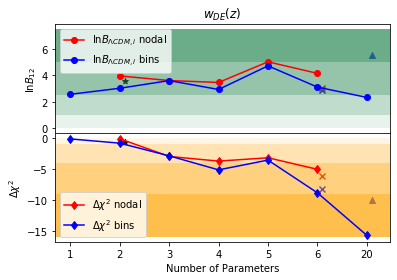

In [42]:
#para eos zhao_new con prior reducidos [0.0,-2.5]

import matplotlib.pyplot as plt
import numpy as np

lcdm = [530.791,525.378]

foury2x_nodal = [533.804,522.266]
foury2x_tanh  = [533.658,521.365]
cpl           = [534.335,525.037]
tanh20_corr   = [536.315,520.390]

nodal = {#1:[533.359,525.306],
         2:[534.752,525.318],
         3:[534.403,523.888],
         4:[534.258,523.508],
         5:[535.824,523.779],
         6:[534.949,522.846]}

tanh = {1:[533.359,525.306],
        2:[533.817,524.961],
        3:[534.398,523.936],
        4:[533.724,522.800],
        5:[535.518,523.591],
        6:[533.906,520.945],
        7:[533.124,517.504]#este es el de 20
       }

x=[]
y1=[]
y2=[]
for i in nodal:
    x += [i]
    y1 += [nodal[i][0] - lcdm[0]]
    y2 += [nodal[i][1]*(2.) + lcdm[1]*(-2.)]
    
l=[]
k1=[]
k2=[]
for i in tanh:
    l += [i]
    k1 += [tanh[i][0] - lcdm[0]]
    k2 += [tanh[i][1]*(2.) + lcdm[1]*(-2.)]
    

#labels=['1','2','3','4','5','6','20']

#4y2x
h=[6.1,6.1]
m1=[foury2x_nodal[0] - lcdm[0],foury2x_nodal[1]*(2.)+ lcdm[1]*(-2.)]
m2=[foury2x_tanh[0] - lcdm[0],foury2x_tanh[1]*(2.)+ lcdm[1]*(-2.)-0.2]

#cpl
h_cpl=[2.1,2.1]
m1_cpl=[cpl[0] - lcdm[0],cpl[1]*(2.)+ lcdm[1]*(-2.)]

#corr_func
h_corr=[7.1,7.1]
m1_corr=[tanh20_corr[0] - lcdm[0],tanh20_corr[1]*(2.)+ lcdm[1]*(-2.)]
    

fig, ax = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0)

ax[0].axhspan(0, 1, facecolor='seagreen', alpha=0.1)
ax[0].axhspan(1, 2.5, facecolor='seagreen', alpha=0.3)
ax[0].axhspan(2.5, 5, facecolor='seagreen', alpha=0.5)
ax[0].axhspan(5, 7.5, facecolor='seagreen', alpha=0.7)

ax[1].axhspan(-9, -16, facecolor='orange', alpha=0.7)
ax[1].axhspan(-9,-4, facecolor='orange', alpha=0.5)
ax[1].axhspan(-4, -1, facecolor='orange', alpha=0.3)
ax[1].axhspan(-1, 0, facecolor='orange', alpha=0.1)
        
plt.rc('font', size=10)

for ii in [0,1]:
    ax[ii].scatter(h_cpl[ii],m1_cpl[ii],marker='*',c='k')
    ax[ii].scatter(h[ii],m2[ii],marker='x',c='b')
    ax[ii].scatter(h_corr[ii],m1_corr[ii],marker='^',c='b')
    ax[ii].scatter(h[ii],m1[ii],marker='x',c='r')
    if ii == 0:
        ax[ii].plot(x,y1,marker='o',c='r')
        ax[ii].plot(l,k1,marker='o',c='b')
    if ii == 1:
        ax[ii].plot(x,y2,marker='d',c='r')
        ax[ii].plot(l,k2,marker='d',c='b')
    

ticks = np.arange(4, 16, 1)
plt.xticks(ticks=l,labels=['1','2','3','4','5','6','20'])
plt.xlabel(r'Number of Parameters')
ax[0].set_ylabel(r'$\ln B_{12}$')
ax[1].set_ylabel(r'$\Delta \chi^2$')

ax[0].legend(([r'$\ln B_{\Lambda CDM,i}$ nodal', r'$\ln B_{\Lambda CDM,i}$ bins']))
ax[1].legend(([r'$\Delta \chi^2$ nodal',r'$\Delta \chi^2$ bins']))


ax[0].title.set_text(r'$w_{DE}(z)$')

plt.savefig('figs_full_panth/graph_fitness_full_panth_eos_reduced_prior_semaforo.pdf')